In [ ]:
pip install tabula-py


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 90.2 MB/s eta 0:00:00


In [ ]:
import tabula

# Define the path to the PDF
pdf_path = "ADSI_2022_Report.pdf"

# Extract tables from the PDF
import tabula
tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)


Mar 22, 2025 5:40:51 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Mar 22, 2025 5:40:51 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>



In [ ]:
from tabula import read_pdf
tables = read_pdf(pdf_path, pages='all', multiple_tables=True)


#RA2021_A1.csv

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/RA2021_A1.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Years                                                      32 non-null     object 
 1   Total Number of Road Accidents (in numbers)                32 non-null     float64
 2   Total Number of Persons Killed (in numbers)                32 non-null     float64
 3   Total Number of Persons Injured (in numbers)               32 non-null     float64
 4   Population of India (in thousands)                         32 non-null     float64
 5   Total Number of Registered Motor Vehicles (in thousands)   31 non-null     float64
 6   Road Length (in kms)                                       30 non-null     float64
 7   Number of Accidents per Lakh Population                    31 non-null     float64
 8   Number of Ac

(None,
   Years  Total Number of Road Accidents (in numbers)   \
 0  1970                                      114100.0   
 1  1980                                      153200.0   
 2  1990                                      282600.0   
 3  1994                                      325864.0   
 4  1995                                      351999.0   
 
    Total Number of Persons Killed (in numbers)   \
 0                                       14500.0   
 1                                       24000.0   
 2                                       54100.0   
 3                                       64463.0   
 4                                       70781.0   
 
    Total Number of Persons Injured (in numbers)  \
 0                                       70100.0   
 1                                      109100.0   
 2                                      244100.0   
 3                                      311500.0   
 4                                      323200.0   
 
    Population 

In [ ]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values in each column:
 Years                                                        0
Total Number of Road Accidents (in numbers)                  0
Total Number of Persons Killed (in numbers)                  0
Total Number of Persons Injured (in numbers)                 0
Population of India (in thousands)                           0
Total Number of Registered Motor Vehicles (in thousands)     1
Road Length (in kms)                                         2
Number of Accidents per Lakh Population                      1
Number of Accidents per Ten Thousand Vehicles                2
Number of Accidents per Ten Thousand Kms of Roads            3
Number of Persons Killed Per Lakh Population                 1
Number of Persons Killed Per Ten Thousand Vehicles           2
Number of Persons Killed per Ten Thousand Kms of Roads       3
Number of Persons Injured per Lakh Population                1
Number of Persons Injured Per Ten Thousand Vehicles          2
Number of Persons Injur

In [ ]:
# Fill missing values with median (or you can use mean) for numeric columns only
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median()) # Fill missing values in numeric columns


# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Check for outliers using IQR for numeric columns only
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
print("\nNumber of outliers per column:\n", outliers.sum())


Number of outliers per column:
 Total Number of Road Accidents (in numbers)                  3
Total Number of Persons Killed (in numbers)                  0
Total Number of Persons Injured (in numbers)                 3
Population of India (in thousands)                           2
Total Number of Registered Motor Vehicles (in thousands)     0
Road Length (in kms)                                         1
Number of Accidents per Lakh Population                      3
Number of Accidents per Ten Thousand Vehicles                2
Number of Accidents per Ten Thousand Kms of Roads            0
Number of Persons Killed Per Lakh Population                 1
Number of Persons Killed Per Ten Thousand Vehicles           2
Number of Persons Killed per Ten Thousand Kms of Roads       2
Number of Persons Injured per Lakh Population                2
Number of Persons Injured Per Ten Thousand Vehicles          2
Number of Persons Injured Per Ten Thousand Kms of Roads      0
dtype: int64


In [ ]:
# Generate summary statistics
print("\nBasic Statistical Summary:\n", df.describe())

# Correlation Matrix to see relationships, excluding non-numeric columns
print("\nCorrelation Matrix:\n", df.select_dtypes(include=['number']).corr()) # Select only numeric columns for correlation


Basic Statistical Summary:
        Total Number of Road Accidents (in numbers)   \
count                                     32.000000   
mean                                  398155.691875   
std                                   117175.097293   
min                                       -1.860000   
25%                                   373054.250000   
50%                                   421171.000000   
75%                                   481665.000000   
max                                   501423.000000   

       Total Number of Persons Killed (in numbers)   \
count                                     32.000000   
mean                                  101583.993125   
std                                    42261.936600   
min                                        0.780000   
25%                                    78427.500000   
50%                                   100358.500000   
75%                                   138611.250000   
max                                

Index(['Years', 'Total Number of Road Accidents (in numbers) ',
       'Total Number of Persons Killed (in numbers) ',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands) ',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads ',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles ',
       'Number of Persons Killed per Ten Thousand Kms of Roads ',
       'Number of Persons Injured per Lakh Population ',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads '],
      dtype='object')


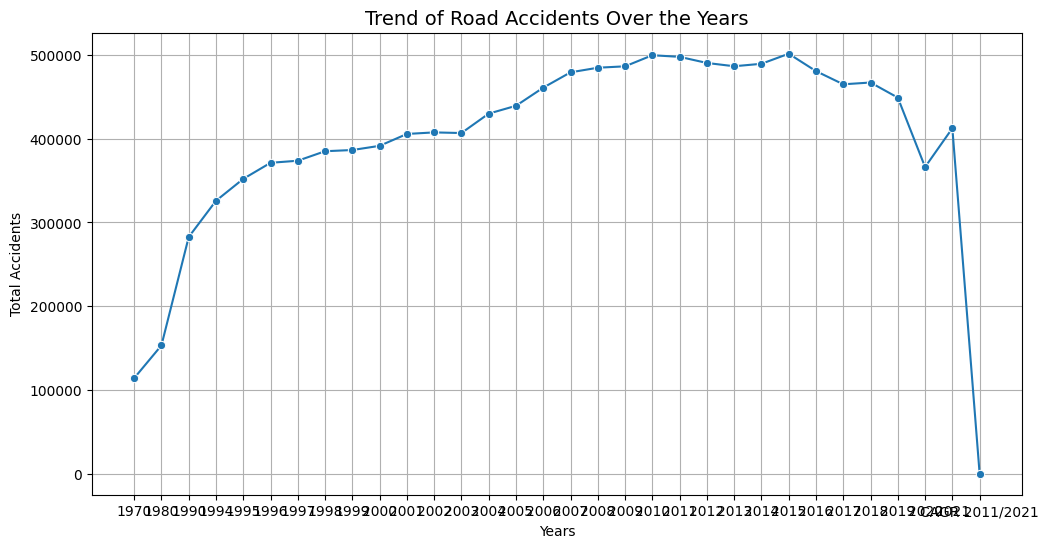

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the available columns in your DataFrame to confirm the exact name
print(df.columns)

# Access the column using its exact name from the printed list
# Example: If the printed list shows 'Total Number of Road Accidents (in numbers) ',
# then use that exact name including any spaces:
y_column = df.columns[1]  # Get the exact name from the column index


plt.figure(figsize=(12,6))
sns.lineplot(x=df["Years"], y=df[y_column], marker='o')
plt.title("Trend of Road Accidents Over the Years", fontsize=14)
plt.xlabel("Years")
plt.ylabel("Total Accidents")
plt.grid()
plt.show()

Index(['Years', 'Total Number of Road Accidents (in numbers) ',
       'Total Number of Persons Killed (in numbers) ',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands) ',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads ',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles ',
       'Number of Persons Killed per Ten Thousand Kms of Roads ',
       'Number of Persons Injured per Lakh Population ',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads '],
      dtype='object')


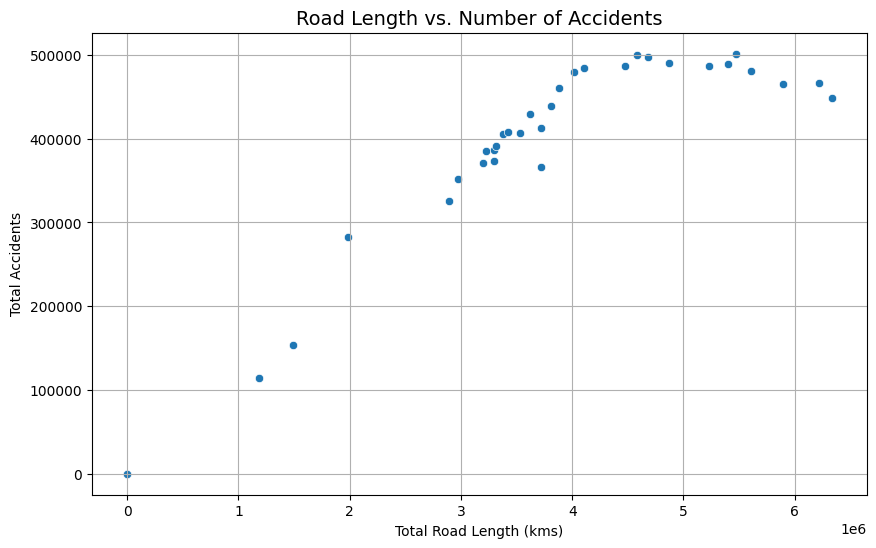

In [ ]:
plt.figure(figsize=(10,6))
# Print the columns to verify their names
print(df.columns)

# Assuming 'Total Number of Road Accidents (in numbers)' is the correct column name:
# Check for extra spaces or typos in the column name
# and adjust it based on the printed output.
# For example, if the actual column name is 'Total Number of Road Accidents (in numbers) ',
# use the following:
# sns.scatterplot(x=df["Road Length (in kms)"], y=df["Total Number of Road Accidents (in numbers) "])
sns.scatterplot(x=df["Road Length (in kms)"], y=df[df.columns[1]])  # Access column by index if name is tricky
plt.title("Road Length vs. Number of Accidents", fontsize=14)
plt.xlabel("Total Road Length (kms)")
plt.ylabel("Total Accidents")
plt.grid()
plt.show()

Index(['Years', 'Total Number of Road Accidents (in numbers) ',
       'Total Number of Persons Killed (in numbers) ',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands) ',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads ',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles ',
       'Number of Persons Killed per Ten Thousand Kms of Roads ',
       'Number of Persons Injured per Lakh Population ',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads '],
      dtype='object')


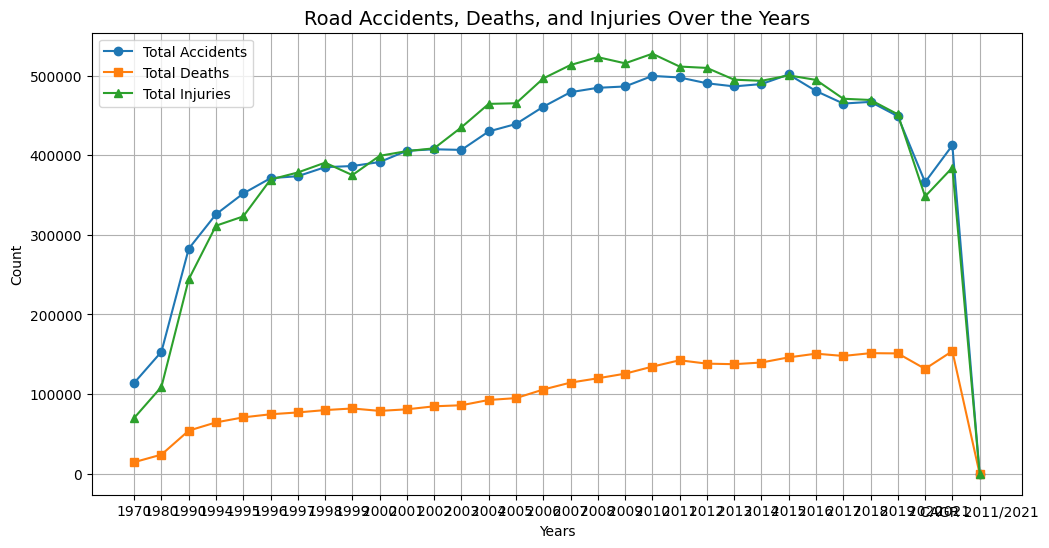

In [ ]:
plt.figure(figsize=(12,6))
# Print the columns to double-check their names
print(df.columns)

# Use the exact column name from the printed output:
plt.plot(df["Years"], df[df.columns[1]], marker='o', label="Total Accidents")
plt.plot(df["Years"], df[df.columns[2]], marker='s', label="Total Deaths")
plt.plot(df["Years"], df[df.columns[3]], marker='^', label="Total Injuries")

plt.title("Road Accidents, Deaths, and Injuries Over the Years", fontsize=14)
plt.xlabel("Years")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()

Index(['Years', 'Total Number of Road Accidents (in numbers) ',
       'Total Number of Persons Killed (in numbers) ',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands) ',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads ',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles ',
       'Number of Persons Killed per Ten Thousand Kms of Roads ',
       'Number of Persons Injured per Lakh Population ',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads '],
      dtype='object')


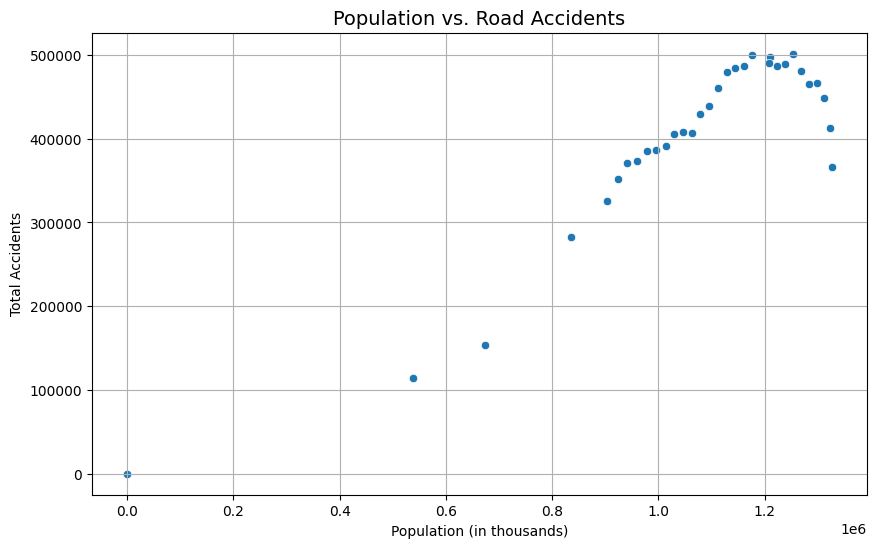

In [ ]:
plt.figure(figsize=(10,6))
# Print the columns to double-check their names
print(df.columns)

# Use the exact column name from the printed output.
# If there's a space at the end of the column name, include it!
# For example, if the printed column name is:
# 'Total Number of Road Accidents (in numbers) ', use that:
# sns.scatterplot(x=df["Population of India (in thousands)"], y=df["Total Number of Road Accidents (in numbers) "])

# If the column name is different, replace it accordingly:
sns.scatterplot(x=df["Population of India (in thousands)"], y=df[df.columns[1]])  # Access by index as a backup
plt.title("Population vs. Road Accidents", fontsize=14)
plt.xlabel("Population (in thousands)")
plt.ylabel("Total Accidents")
plt.grid()
plt.show()

Index(['Years', 'Total Number of Road Accidents (in numbers) ',
       'Total Number of Persons Killed (in numbers) ',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands) ',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads ',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles ',
       'Number of Persons Killed per Ten Thousand Kms of Roads ',
       'Number of Persons Injured per Lakh Population ',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads '],
      dtype='object')


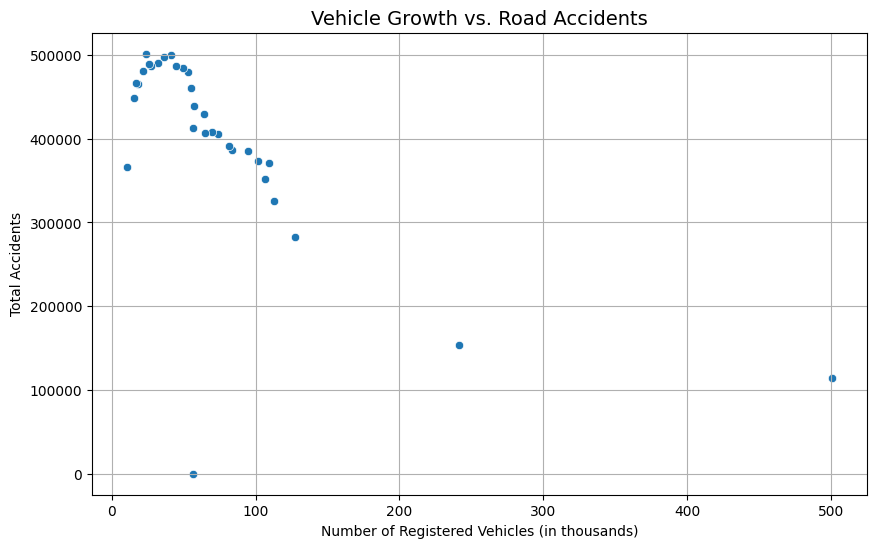

In [ ]:
plt.figure(figsize=(10,6))
# Print the columns to double-check their names
print(df.columns)

# Use the exact column name from the printed output.
# If there's a space at the end of the column name, include it!
# For example, if the printed column name is:
# 'Total Number of Registered Motor Vehicles (in thousands) ', use that:
# If the column name is different based on the printed df.columns,
# replace 'Total Number of Registered Motor Vehicles (in thousands)' with the correct name

# Assuming the correct column name is at index 14 based on the error and expected column names:
sns.scatterplot(x=df[df.columns[14]],  # Access by index for the 'Total Number of Registered...' column
                y=df[df.columns[1]])
plt.title("Vehicle Growth vs. Road Accidents", fontsize=14)
plt.xlabel("Number of Registered Vehicles (in thousands)")
plt.ylabel("Total Accidents")
plt.grid()
plt.show()

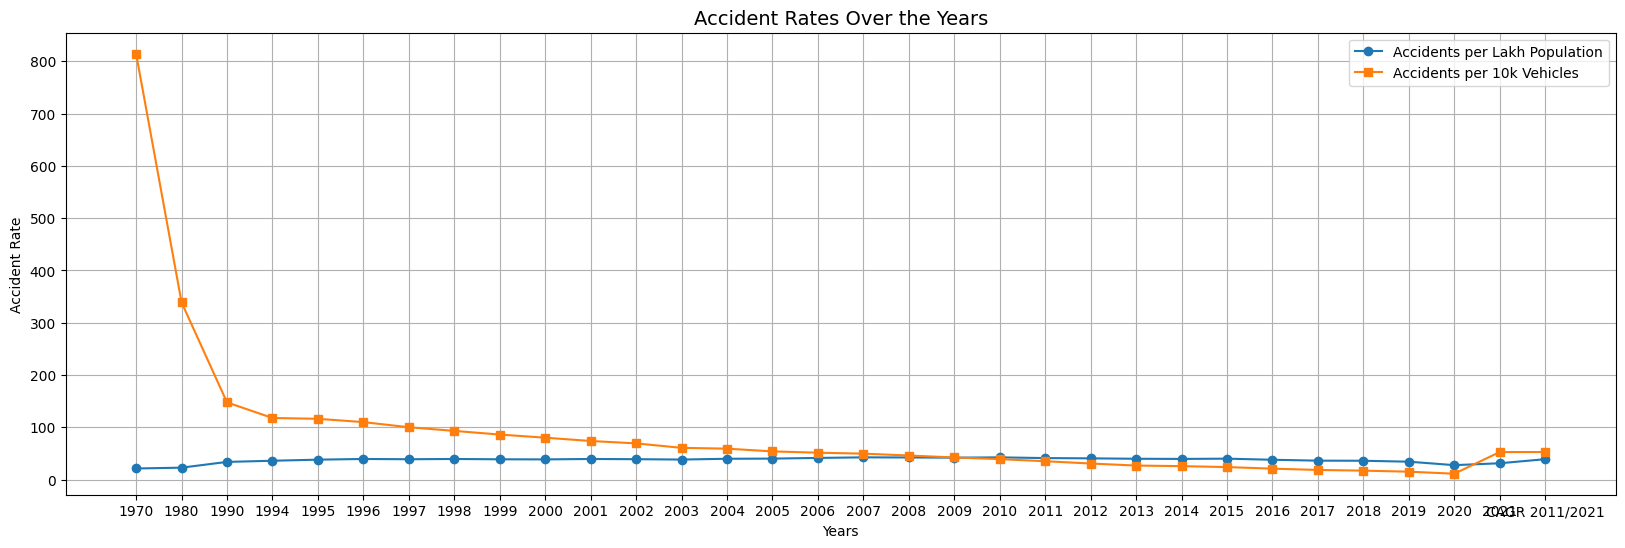

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df["Years"], df["Number of Accidents per Lakh Population"], marker='o', label="Accidents per Lakh Population")
plt.plot(df["Years"], df["Number of Accidents per Ten Thousand Vehicles"], marker='s', label="Accidents per 10k Vehicles")

plt.title("Accident Rates Over the Years", fontsize=14)
plt.xlabel("Years")
plt.ylabel("Accident Rate")
plt.legend()
plt.grid()
plt.show()


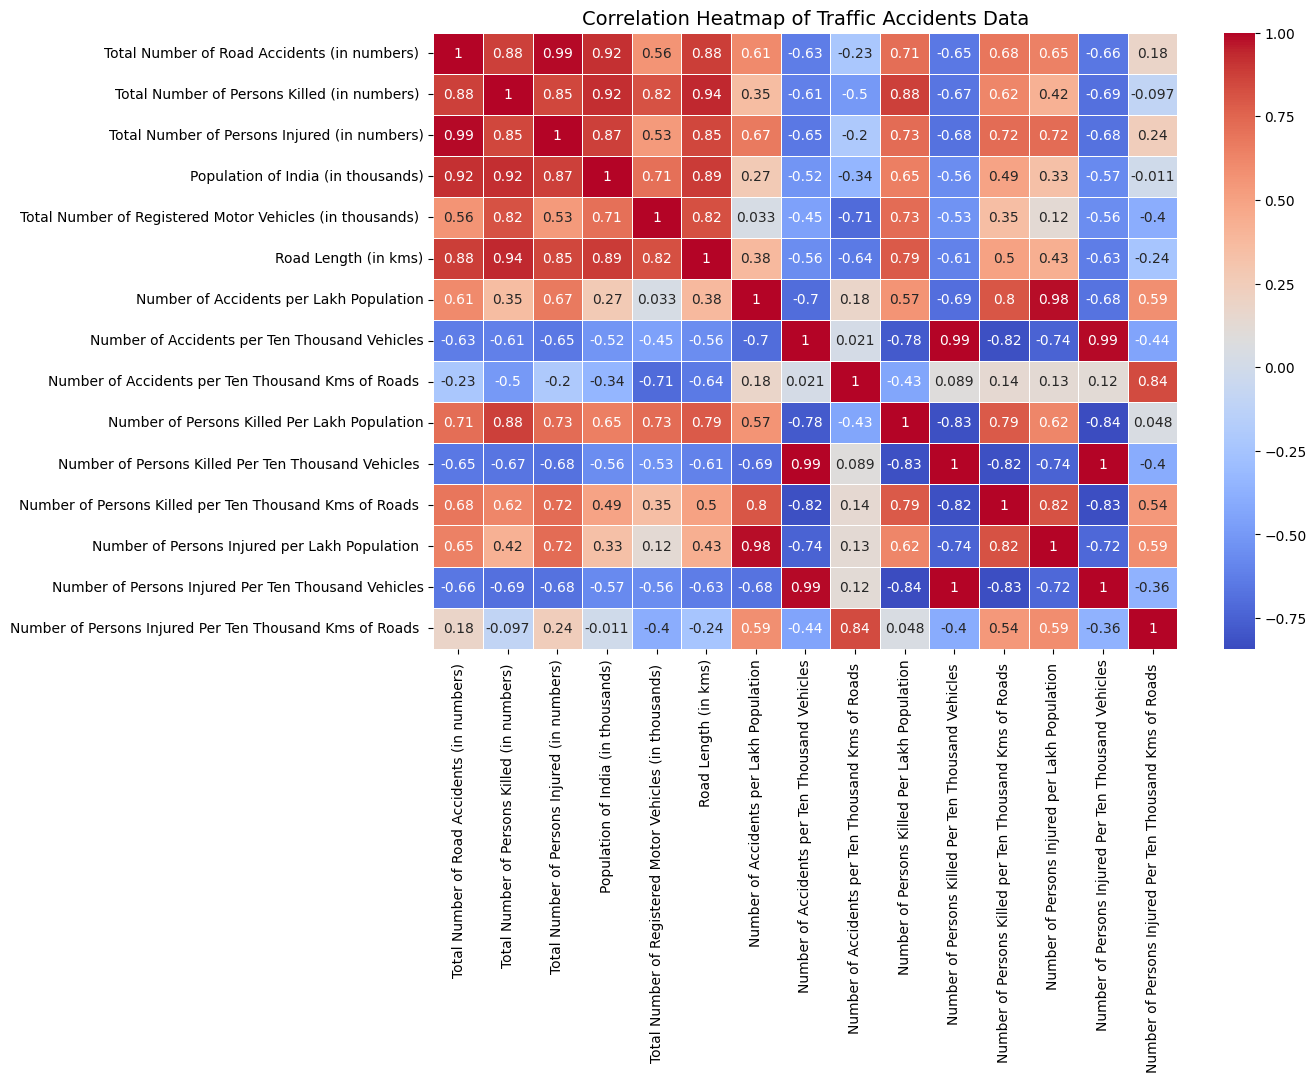

In [ ]:
plt.figure(figsize=(12,8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Traffic Accidents Data", fontsize=14)
plt.show()

Index(['Years', 'Total Number of Road Accidents (in numbers) ',
       'Total Number of Persons Killed (in numbers) ',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands) ',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads ',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles ',
       'Number of Persons Killed per Ten Thousand Kms of Roads ',
       'Number of Persons Injured per Lakh Population ',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads ',
       'Fatality Rate', 'Injury Rate'],
      dtype='object')


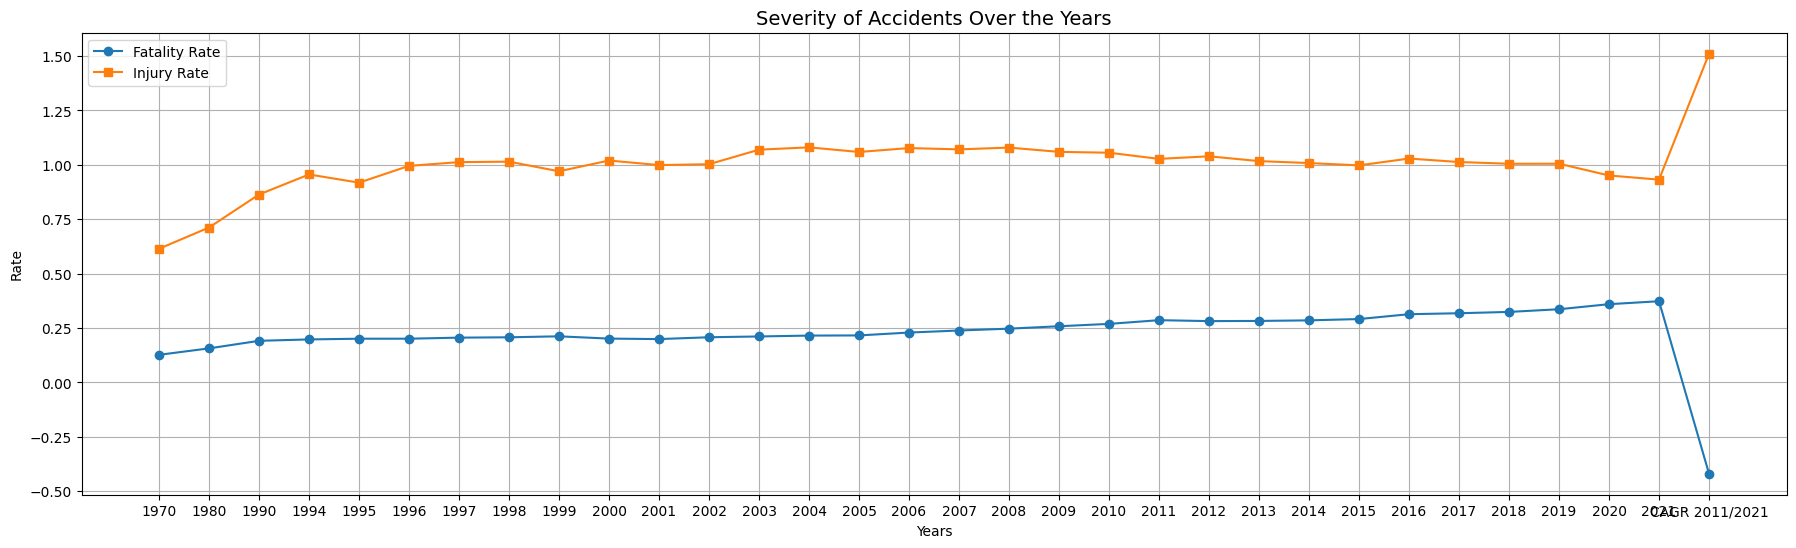

In [ ]:
# Print the columns to see their actual names:
print(df.columns)

# ... (other code) ...

# Assuming the column name is "Total Number of Persons Killed (in numbers) " based on the printed output:
df["Fatality Rate"] = df['Total Number of Persons Killed (in numbers) '] / df["Total Number of Road Accidents (in numbers) "]
df["Injury Rate"] = df["Total Number of Persons Injured (in numbers)"] / df["Total Number of Road Accidents (in numbers) "]

plt.figure(figsize=(22,6))
plt.plot(df["Years"], df["Fatality Rate"], marker='o', label="Fatality Rate")
plt.plot(df["Years"], df["Injury Rate"], marker='s', label="Injury Rate")

plt.title("Severity of Accidents Over the Years", fontsize=14)
plt.xlabel("Years")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/RA2021_A1.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


Years  Total Number of Road Accidents (in numbers)   \
0  1970                                      114100.0   
1  1980                                      153200.0   
2  1990                                      282600.0   
3  1994                                      325864.0   
4  1995                                      351999.0   

   Total Number of Persons Killed (in numbers)   \
0                                       14500.0   
1                                       24000.0   
2                                       54100.0   
3                                       64463.0   
4                                       70781.0   

   Total Number of Persons Injured (in numbers)  \
0                                       70100.0   
1                                      109100.0   
2                                      244100.0   
3                                      311500.0   
4                                      323200.0   

   Population of India (in thousands)  \
0                            539000.0   
1                            673000.0   
2                            835000.0   
3                            904000.0   
4                            924359.0   

   Total Number of Registered Motor Vehicles (in thousands)   \
0                                             1401.0           
1                                             4521.0           
2                                            19152.0           
3                                            27660.0           
4                                            30295.0           

   Road Length (in kms)  Number of Accidents per Lakh Population  \
0             1188728.0                                     21.2   
1             1491873.0                                     22.8   
2             1983867.0                                     33.8   
3             2890950.0                                     36.0   
4             2975035.0                                     38.1   

   Number of Accidents per Ten Thousand Vehicles  \
0                                          814.4   
1                                          338.9   
2                                          147.6   
3                                          117.8   
4                                          116.2   

   Number of Accidents per Ten Thousand Kms of Roads   \
0                                              959.8    
1                                             1026.9    
2                                             1424.5    
3                                             1127.2    
4                                             1183.2    

   Number of Persons Killed Per Lakh Population  \
0                                           2.7   
1                                           3.6   
2                                           6.5   
3                                           7.1   
4                                           7.7   

   Number of Persons Killed Per Ten Thousand Vehicles   \
0                                              103.5     
1                                               53.1     
2                                               28.2     
3                                               23.3     
4                                               23.4     

   Number of Persons Killed per Ten Thousand Kms of Roads   \
0                                              122.0         
1                                              160.9         
2                                              272.7         
3                                              223.0         
4                                              237.9         

   Number of Persons Injured per Lakh Population   \
0                                            13.0   
1                                            16.2   
2                                            29.2   
3                                            34.5   
4                                            35.0   



In [ ]:
# Check dataset info
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Years                                                      32 non-null     object 
 1   Total Number of Road Accidents (in numbers)                32 non-null     float64
 2   Total Number of Persons Killed (in numbers)                32 non-null     float64
 3   Total Number of Persons Injured (in numbers)               32 non-null     float64
 4   Population of India (in thousands)                         32 non-null     float64
 5   Total Number of Registered Motor Vehicles (in thousands)   31 non-null     float64
 6   Road Length (in kms)                                       30 non-null     float64
 7   Number of Accidents per Lakh Population                    31 non-null     float64
 8   Number of Ac

Years                                                        0
Total Number of Road Accidents (in numbers)                  0
Total Number of Persons Killed (in numbers)                  0
Total Number of Persons Injured (in numbers)                 0
Population of India (in thousands)                           0
Total Number of Registered Motor Vehicles (in thousands)     1
Road Length (in kms)                                         2
Number of Accidents per Lakh Population                      1
Number of Accidents per Ten Thousand Vehicles                2
Number of Accidents per Ten Thousand Kms of Roads            3
Number of Persons Killed Per Lakh Population                 1
Number of Persons Killed Per Ten Thousand Vehicles           2
Number of Persons Killed per Ten Thousand Kms of Roads       3
Number of Persons Injured per Lakh Population                1
Number of Persons Injured Per Ten Thousand Vehicles          2
Number of Persons Injured Per Ten Thousand Kms of Roads      3
dtype: int64

In [ ]:
# Convert 'Years' column to numeric
df["Years"] = pd.to_numeric(df["Years"], errors='coerce')  # 'coerce' will replace invalid values with NaN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
# Display basic info
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Years                                                      32 non-null     object 
 1   Total Number of Road Accidents (in numbers)                32 non-null     float64
 2   Total Number of Persons Killed (in numbers)                32 non-null     float64
 3   Total Number of Persons Injured (in numbers)               32 non-null     float64
 4   Population of India (in thousands)                         32 non-null     float64
 5   Total Number of Registered Motor Vehicles (in thousands)   31 non-null     float64
 6   Road Length (in kms)                                       30 non-null     float64
 7   Number of Accidents per Lakh Population                    31 non-null     float64
 8   Number of Ac

In [ ]:
# Total number of accidents over the years
total_accidents = df[df.columns[1]].sum()  # Access the column by index assuming "Total Number of Road Accidents (in numbers) " is the correct column name based on the printed df.columns in previous cells
print(f"Total Accidents: {total_accidents}")

# Average number of accidents per year
average_accidents = df[df.columns[1]].mean() # Access the column by index assuming "Total Number of Road Accidents (in numbers) " is the correct column name based on the printed df.columns in previous cells
print(f"Average Accidents per Year: {average_accidents}")

Total Accidents: 12740982.14
Average Accidents per Year: 398155.691875


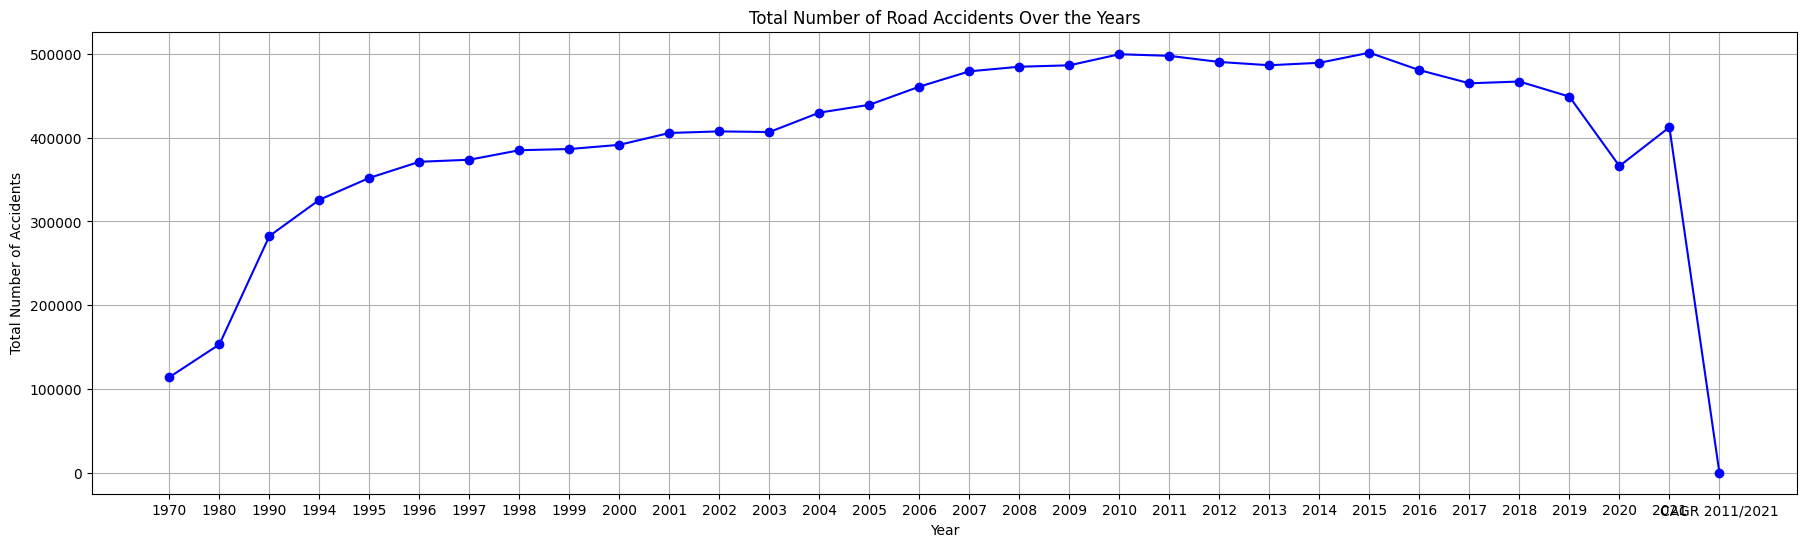

In [ ]:
import matplotlib.pyplot as plt

# Plot total accidents over the years
plt.figure(figsize=(22, 6))
# Access the column by its actual name (from df.columns) instead of 'Total_Accidents'
plt.plot(df['Years'], df[df.columns[1]], marker='o', linestyle='-', color='b')
plt.title('Total Number of Road Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Accidents')
plt.grid(True)
plt.show()

Index(['Years', 'Total Number of Road Accidents (in numbers) ',
       'Total Number of Persons Killed (in numbers) ',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands) ',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads ',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles ',
       'Number of Persons Killed per Ten Thousand Kms of Roads ',
       'Number of Persons Injured per Lakh Population ',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads ',
       'Accident_Severity_Index'],
      dtype='object')


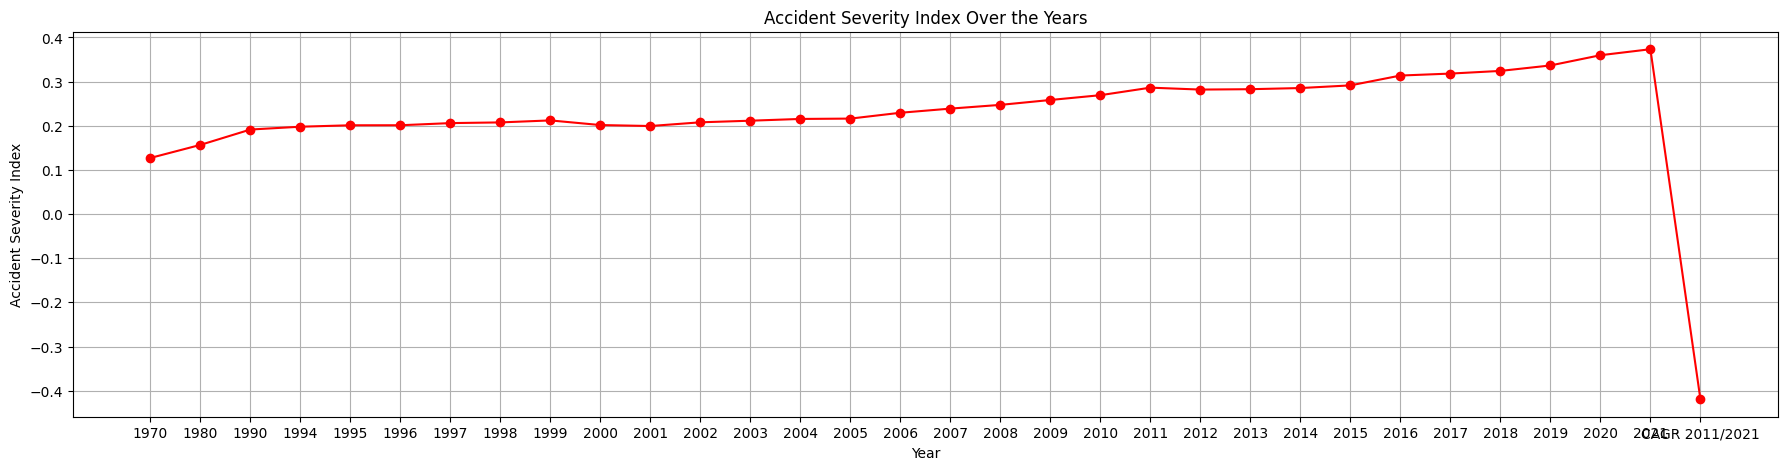

In [ ]:
# Print the columns of the dataframe to confirm the exact column names
print(df.columns)

# Access the column by its correct name
# Based on the printed output, it appears the column you're looking for might have a space at the end:
# 'Total Number of Persons Killed (in numbers) '
# OR it might just be 'Total Number of Persons Killed (in numbers)'
# Adjust the column name in the code below if necessary
# Assuming the column name has a space at the end:
df['Accident_Severity_Index'] = df['Total Number of Persons Killed (in numbers) '] / df[df.columns[1]]  # Accessing total accidents column using its index, change [1] if needed

# Plot Accident Severity over years
plt.figure(figsize=(22, 5))
plt.plot(df['Years'], df['Accident_Severity_Index'], marker='o', linestyle='-', color='r')
plt.title('Accident Severity Index Over the Years')
plt.xlabel('Year')
plt.ylabel('Accident Severity Index')
plt.grid(True)
plt.show()

In [ ]:
print(df.columns)


Index(['Years', 'Total Number of Road Accidents (in numbers) ',
       'Total Number of Persons Killed (in numbers) ',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands) ',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads ',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles ',
       'Number of Persons Killed per Ten Thousand Kms of Roads ',
       'Number of Persons Injured per Lakh Population ',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads ',
       'Accident_Severity_Index'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Remove trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores

print(df.columns)  # Verify changes


Index(['Years', 'Total_Number_of_Road_Accidents_(in_numbers)',
       'Total_Number_of_Persons_Killed_(in_numbers)',
       'Total_Number_of_Persons_Injured_(in_numbers)',
       'Population_of_India_(in_thousands)',
       'Total_Number_of_Registered_Motor_Vehicles_(in_thousands)',
       'Road_Length_(in_kms)', 'Number_of_Accidents_per_Lakh_Population',
       'Number_of_Accidents_per_Ten_Thousand_Vehicles',
       'Number_of_Accidents_per_Ten_Thousand_Kms_of_Roads',
       'Number_of_Persons_Killed_Per_Lakh_Population',
       'Number_of_Persons_Killed_Per_Ten_Thousand_Vehicles',
       'Number_of_Persons_Killed_per_Ten_Thousand_Kms_of_Roads',
       'Number_of_Persons_Injured_per_Lakh_Population',
       'Number_of_Persons_Injured_Per_Ten_Thousand_Vehicles',
       'Number_of_Persons_Injured_Per_Ten_Thousand_Kms_of_Roads',
       'Accident_Severity_Index'],
      dtype='object')


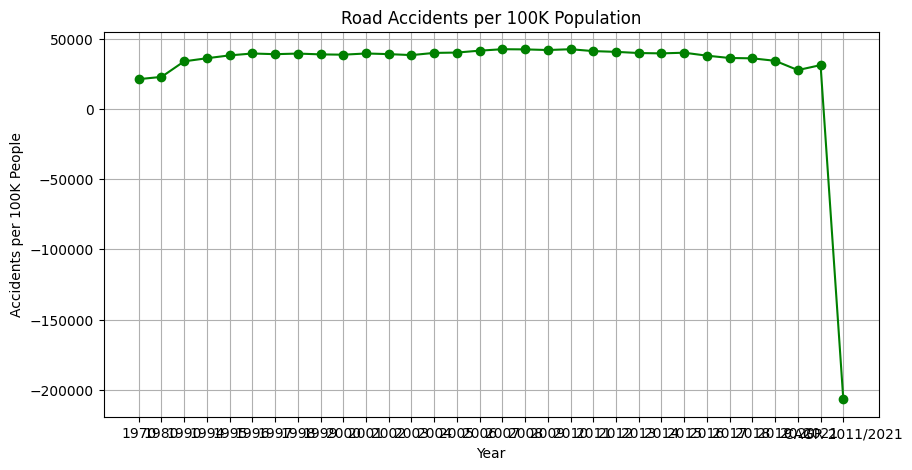

In [ ]:
df['Accidents_per_100K_People'] = (df['Total_Number_of_Road_Accidents_(in_numbers)'] / df['Population_of_India_(in_thousands)']) * 100000

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Years'], df['Accidents_per_100K_People'], marker='o', linestyle='-', color='g')
plt.title('Road Accidents per 100K Population')
plt.xlabel('Year')
plt.ylabel('Accidents per 100K People')
plt.grid(True)
plt.show()


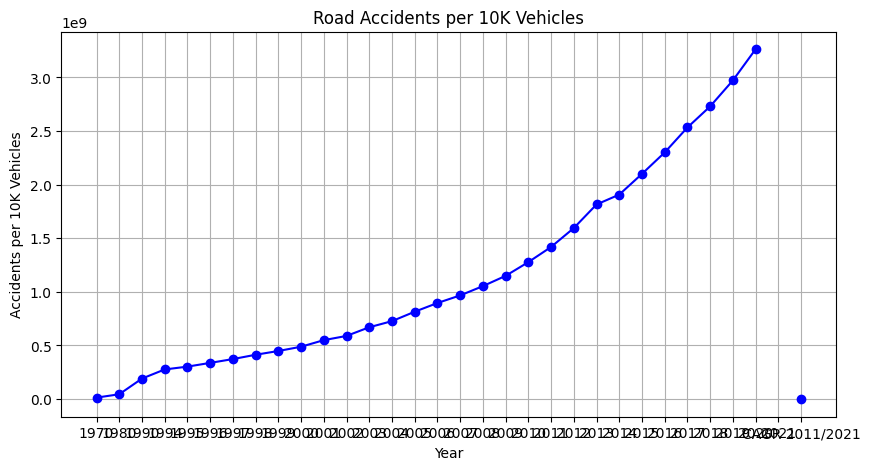

In [ ]:
df['Accidents_per_10K_Vehicles'] = (df['Total_Number_of_Registered_Motor_Vehicles_(in_thousands)']) * 10000

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Years'], df['Accidents_per_10K_Vehicles'], marker='o', linestyle='-', color='b')
plt.title('Road Accidents per 10K Vehicles')
plt.xlabel('Year')
plt.ylabel('Accidents per 10K Vehicles')
plt.grid(True)
plt.show()


#Highway analysis - Highway_Report_Accedients.csv

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/highway data analysis.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   sl . NO                           37 non-null     int64 
 1   States/UTs                        37 non-null     object
 2   2019_KILLED ACCIDENTS             37 non-null     int64 
 3   2020_KILLED ACCIDENTS             37 non-null     int64 
 4   2021_KILLED ACCIDENTS             37 non-null     int64 
 5   2022_KILLED ACCIDENTS             37 non-null     int64 
 6   Total_KILLED ACCIDENTS            37 non-null     int64 
 7   Rank_KILLED ACCIDENTS             37 non-null     int64 
 8   2019_KILLED ACCIDENTS.1           37 non-null     int64 
 9   2020_KILLED ACCIDENTS.1           37 non-null     int64 
 10  2021_KILLED ACCIDENTS.1           37 non-null     int64 
 11  2022_KILLED ACCIDENTS.1           37 non-null     int64 
 12  Total_KILLED ACCIDENTS.1

In [ ]:
print(df.isnull().sum())  # Count of missing values per column


sl . NO                             0
States/UTs                          0
2019_KILLED ACCIDENTS               0
2020_KILLED ACCIDENTS               0
2021_KILLED ACCIDENTS               0
2022_KILLED ACCIDENTS               0
Total_KILLED ACCIDENTS              0
Rank_KILLED ACCIDENTS               0
2019_KILLED ACCIDENTS.1             0
2020_KILLED ACCIDENTS.1             0
2021_KILLED ACCIDENTS.1             0
2022_KILLED ACCIDENTS.1             0
Total_KILLED ACCIDENTS.1            0
Rank_KILLED ACCIDENTS.1             0
2019_INJURED ACCIDENTS              0
2020_INJURED ACCIDENTS              0
2021_INJURED ACCIDENTS              0
2022_INJURED ACCIDENTS              0
Total_INJURED ACCIDENTS             0
Rank_INJURED ACCIDENTS              0
2019_Total number of  ACCIDENTS     0
2020_Total number of  ACCIDENTS     0
2021_Total number of  ACCIDENTS     0
2022_Total number of  ACCIDENTS     0
Total_Total number of  ACCIDENTS    0
Rank_Total number of  ACCIDENTS     0
dtype: int64

In [ ]:
print(df.dtypes)  # Check column data types


sl . NO                              int64
States/UTs                          object
2019_KILLED ACCIDENTS                int64
2020_KILLED ACCIDENTS                int64
2021_KILLED ACCIDENTS                int64
2022_KILLED ACCIDENTS                int64
Total_KILLED ACCIDENTS               int64
Rank_KILLED ACCIDENTS                int64
2019_KILLED ACCIDENTS.1              int64
2020_KILLED ACCIDENTS.1              int64
2021_KILLED ACCIDENTS.1              int64
2022_KILLED ACCIDENTS.1              int64
Total_KILLED ACCIDENTS.1             int64
Rank_KILLED ACCIDENTS.1              int64
2019_INJURED ACCIDENTS               int64
2020_INJURED ACCIDENTS               int64
2021_INJURED ACCIDENTS               int64
2022_INJURED ACCIDENTS               int64
Total_INJURED ACCIDENTS              int64
Rank_INJURED ACCIDENTS               int64
2019_Total number of  ACCIDENTS      int64
2020_Total number of  ACCIDENTS      int64
2021_Total number of  ACCIDENTS      int64
2022_Total 

In [ ]:
print(df.describe())  # Get statistical insights


         sl . NO  2019_KILLED ACCIDENTS  2020_KILLED ACCIDENTS  \
count  37.000000              37.000000              37.000000   
mean   19.000000            1379.351351            1233.918919   
std    10.824355            1802.943291            1613.187500   
min     1.000000               0.000000               0.000000   
25%    10.000000              43.000000              28.000000   
50%    19.000000             388.000000             320.000000   
75%    28.000000            1832.000000            1667.000000   
max    37.000000            7760.000000            7031.000000   

       2021_KILLED ACCIDENTS  2022_KILLED ACCIDENTS  Total_KILLED ACCIDENTS  \
count              37.000000              37.000000               37.000000   
mean             1377.108108            1501.135135             5491.513514   
std              1730.065506            1861.917637             6987.461213   
min                 0.000000               0.000000                0.000000   
25%       

In [ ]:
print(df.columns)


Index(['sl . NO', 'States/UTs', '2019_KILLED ACCIDENTS',
       '2020_KILLED ACCIDENTS', '2021_KILLED ACCIDENTS',
       '2022_KILLED ACCIDENTS', 'Total_KILLED ACCIDENTS',
       'Rank_KILLED ACCIDENTS', '2019_KILLED ACCIDENTS.1',
       '2020_KILLED ACCIDENTS.1', '2021_KILLED ACCIDENTS.1',
       '2022_KILLED ACCIDENTS.1', 'Total_KILLED ACCIDENTS.1',
       'Rank_KILLED ACCIDENTS.1', '2019_INJURED ACCIDENTS',
       '2020_INJURED ACCIDENTS', '2021_INJURED ACCIDENTS',
       '2022_INJURED ACCIDENTS', 'Total_INJURED ACCIDENTS',
       'Rank_INJURED ACCIDENTS', '2019_Total number of  ACCIDENTS',
       '2020_Total number of  ACCIDENTS', '2021_Total number of  ACCIDENTS',
       '2022_Total number of  ACCIDENTS', 'Total_Total number of  ACCIDENTS',
       'Rank_Total number of  ACCIDENTS'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Remove extra spaces


In [ ]:
df.rename(columns={" Years ": "Years"}, inplace=True)


In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/highway data analysis.csv"
df = pd.read_csv(file_path)

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Rename columns for better clarity
df.rename(columns={
    "2019_KILLED ACCIDENTS": "2019_Killed",
    "2020_KILLED ACCIDENTS": "2020_Killed",
    "2021_KILLED ACCIDENTS": "2021_Killed",
    "2022_KILLED ACCIDENTS": "2022_Killed",
    "Total_KILLED ACCIDENTS": "Total_Killed",

    "2019_INJURED ACCIDENTS": "2019_Injured",
    "2020_INJURED ACCIDENTS": "2020_Injured",
    "2021_INJURED ACCIDENTS": "2021_Injured",
    "2022_INJURED ACCIDENTS": "2022_Injured",
    "Total_INJURED ACCIDENTS": "Total_Injured",

    "2019_Total number of  ACCIDENTS": "2019_Total_Accidents",
    "2020_Total number of  ACCIDENTS": "2020_Total_Accidents",
    "2021_Total number of  ACCIDENTS": "2021_Total_Accidents",
    "2022_Total number of  ACCIDENTS": "2022_Total_Accidents",
    "Total_Total number of  ACCIDENTS": "Total_Accidents",
}, inplace=True)

# Convert numeric values properly
num_cols = df.columns[2:]  # Exclude 'sl . NO' and 'States/UTs'
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Display cleaned data
df.head()


sl . NO         States/UTs  2019_Killed  2020_Killed  2021_Killed  \
0        1     Andhra Pradesh         2760         2617         3226   
1        2  Arunachal Pradesh           43           28           85   
2        3              Assam         1572         1225         1479   
3        4              Bihar         3205         3004         3242   
4        5       Chhattisgarh         1279         1221         1505   

   2022_Killed  Total_Killed  Rank_KILLED ACCIDENTS  2019_KILLED ACCIDENTS.1  \
0         3439         12042                      7                     3114   
1           73           229                     28                       54   
2         1315          5591                     16                     1690   
3         3636         13087                      5                     3436   
4         1703          5708                     15                     1421   

   2020_KILLED ACCIDENTS.1  ...  2021_Injured  2022_Injured  Total_Injured  \
0                     2858  ...          8323          8890          33079   
1                       32  ...           150           106            477   
2                     1322  ...          2631          2541          11166   
3                     3285  ...          3534          3063          13433   
4                     1390  ...          2906          3400          12832   

   Rank_INJURED ACCIDENTS  2019_Total_Accidents  2020_Total_Accidents  \
0                       7                  7682                  7167   
1                      32                    95                    67   
2                      17                  3988                  2963   
3                      14                  4526                  4101   
4                      15                  3811                  3463   

   2021_Total_Accidents  2022_Total_Accidents  Total_Accidents  \
0                  8241                  8650            31740   
1                   147                   131              440   
2                  3408                  3244            13603   
3                  4349                  4601            17577   
4                  3610                  4115            14999   

   Rank_Total number of  ACCIDENTS  
0                                7  
1                               33  
2                               17  
3                               12  
4                               14  

[5 rows x 26 columns]

In [ ]:
df.describe()


sl . NO  2019_Killed  2020_Killed  2021_Killed  2022_Killed  \
count  37.000000    37.000000    37.000000    37.000000    37.000000   
mean   19.000000  1379.351351  1233.918919  1377.108108  1501.135135   
std    10.824355  1802.943291  1613.187500  1730.065506  1861.917637   
min     1.000000     0.000000     0.000000     0.000000     0.000000   
25%    10.000000    43.000000    28.000000    66.000000    68.000000   
50%    19.000000   388.000000   320.000000   393.000000   448.000000   
75%    28.000000  1832.000000  1667.000000  1989.000000  1991.000000   
max    37.000000  7760.000000  7031.000000  7630.000000  7582.000000   

       Total_Killed  Rank_KILLED ACCIDENTS  2019_KILLED ACCIDENTS.1  \
count     37.000000              37.000000                37.000000   
mean    5491.513514              20.378378              1529.108108   
std     6987.461213              12.255047              1998.895011   
min        0.000000               1.000000                 0.000000   
25%      229.000000              10.000000                54.000000   
50%     1531.000000              19.000000               487.000000   
75%     7348.000000              31.000000              2012.000000   
max    30003.000000              39.000000              8830.000000   

       2020_KILLED ACCIDENTS.1  2021_KILLED ACCIDENTS.1  ...  2021_Injured  \
count                37.000000                37.000000  ...     37.000000   
mean               1357.324324              1557.621622  ...   3175.621622   
std                1779.032947              1978.184021  ...   4273.823063   
min                   0.000000                 0.000000  ...      0.000000   
25%                  32.000000                77.000000  ...    168.000000   
50%                 365.000000               430.000000  ...   1138.000000   
75%                1826.000000              2177.000000  ...   3570.000000   
max                7859.000000              8506.000000  ...  17596.000000   

       2022_Injured  Total_Injured  Rank_INJURED ACCIDENTS  \
count     37.000000      37.000000               37.000000   
mean    3895.918919   13765.513514               22.135135   
std     5514.613537   18810.603104               11.764264   
min        0.000000       0.000000                1.000000   
25%      204.000000     673.000000               12.000000   
50%     1410.000000    5261.000000               23.000000   
75%     3927.000000   15046.000000               32.000000   
max    21138.000000   78190.000000               41.000000   

       2019_Total_Accidents  2020_Total_Accidents  2021_Total_Accidents  \
count             37.000000             37.000000             37.000000   
mean            3812.351351           3239.162162           3481.756757   
std             5049.971470           4321.267082           4396.282612   
min                0.000000              0.000000              0.000000   
25%              235.000000            128.000000            153.000000   
50%             2074.000000           1512.000000           1890.000000   
75%             4526.000000           4101.000000           4349.000000   
max            21489.000000          18372.000000          16869.000000   

       2022_Total_Accidents  Total_Accidents  Rank_Total number of  ACCIDENTS  
count             37.000000        37.000000                        37.000000  
mean            4108.027027     14641.297297                        22.270270  
std             5380.963599     18954.697635                        12.033861  
min                0.000000         0.000000                         1.000000  
25%              196.000000       763.000000                        12.000000  
50%             2125.000000      7861.000000                        23.000000  
75%             4601.000000     17577.000000                        33.000000  
max            18972.000000     75702.000000                        40.000000  

[8 rows x 25 columns]

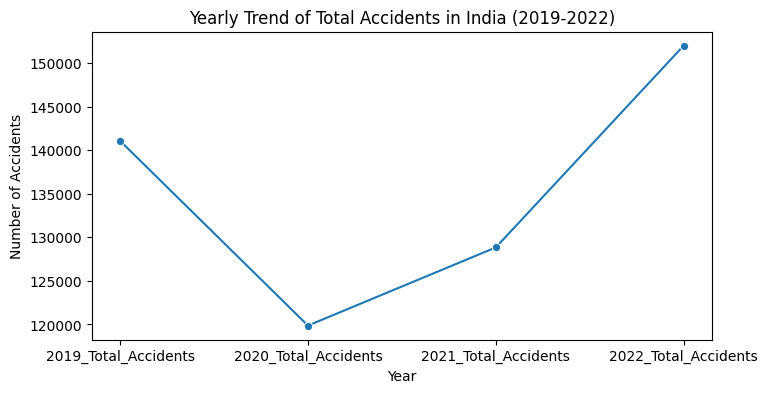

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total accidents over the years
years = ["2019_Total_Accidents", "2020_Total_Accidents", "2021_Total_Accidents", "2022_Total_Accidents"]
df_yearwise = df[["States/UTs"] + years].set_index("States/UTs").sum()

plt.figure(figsize=(8, 4))
sns.lineplot(x=years, y=df_yearwise.values, marker="o")
plt.title("Yearly Trend of Total Accidents in India (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()


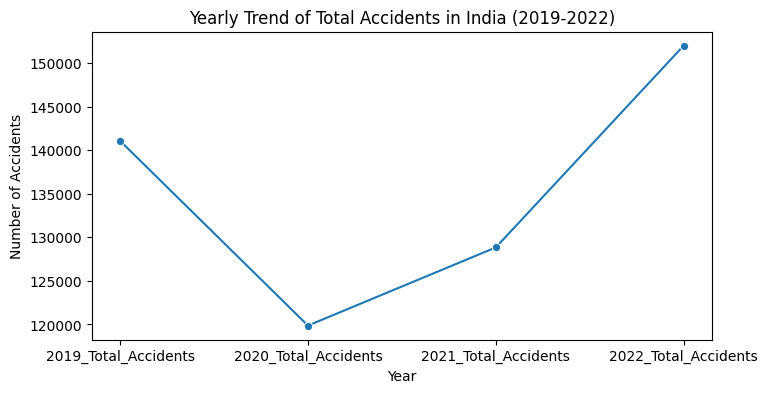

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total accidents over the years
years = ["2019_Total_Accidents", "2020_Total_Accidents", "2021_Total_Accidents", "2022_Total_Accidents"]
df_yearwise = df[["States/UTs"] + years].set_index("States/UTs").sum()

plt.figure(figsize=(8, 4))
sns.lineplot(x=years, y=df_yearwise.values, marker="o")
plt.title("Yearly Trend of Total Accidents in India (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()


<ipython-input-106-a738649c0884>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states["States/UTs"], x=top_states["Total_Accidents"], palette="Reds_r")


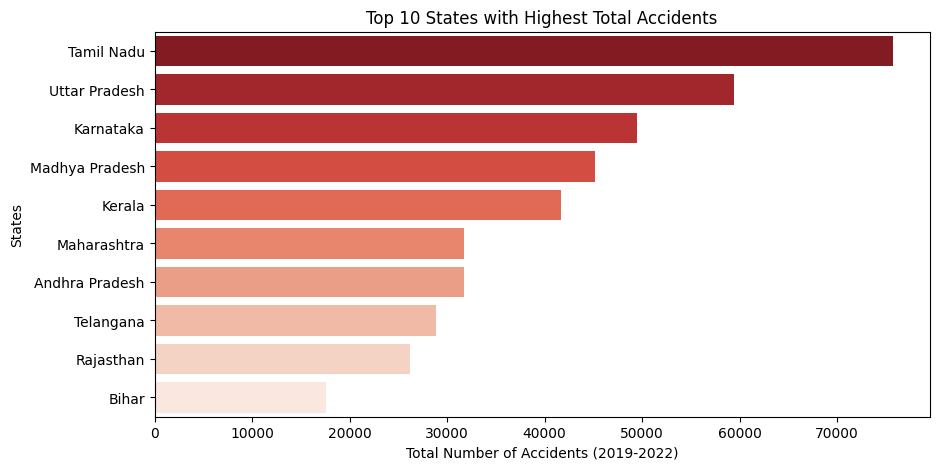

In [ ]:
# Top 10 states with highest total accidents
top_states = df.nlargest(10, "Total_Accidents")

plt.figure(figsize=(10, 5))
sns.barplot(y=top_states["States/UTs"], x=top_states["Total_Accidents"], palette="Reds_r")
plt.xlabel("Total Number of Accidents (2019-2022)")
plt.ylabel("States")
plt.title("Top 10 States with Highest Total Accidents")
plt.show()


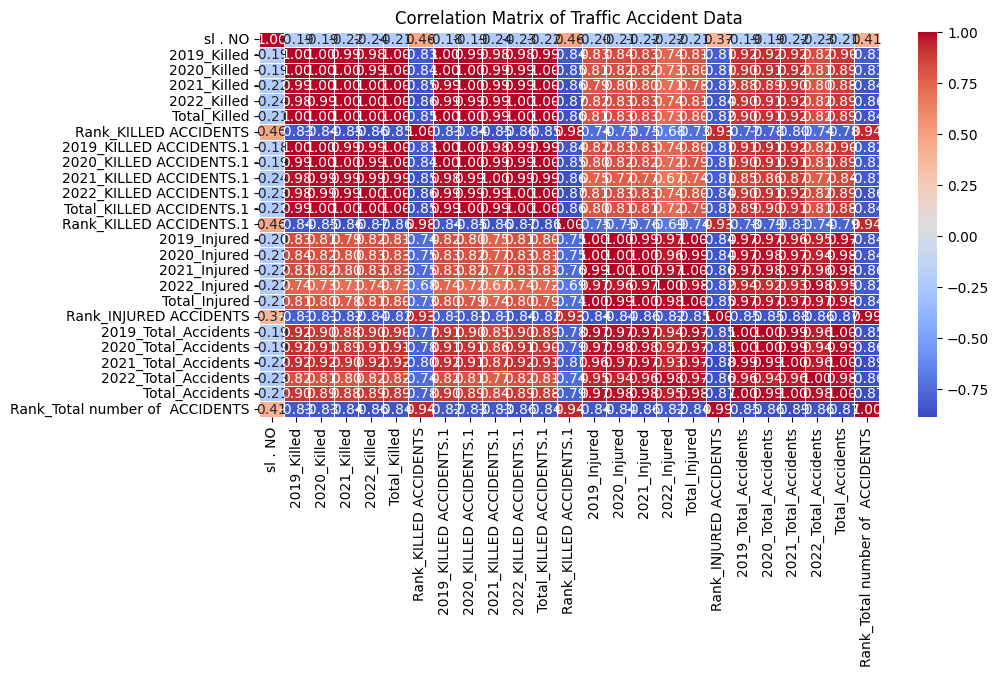

In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Check correlation only for numeric values
plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Traffic Accident Data")
plt.show()


In [ ]:
df.to_csv("cleaned_highway_data.csv", index=False)


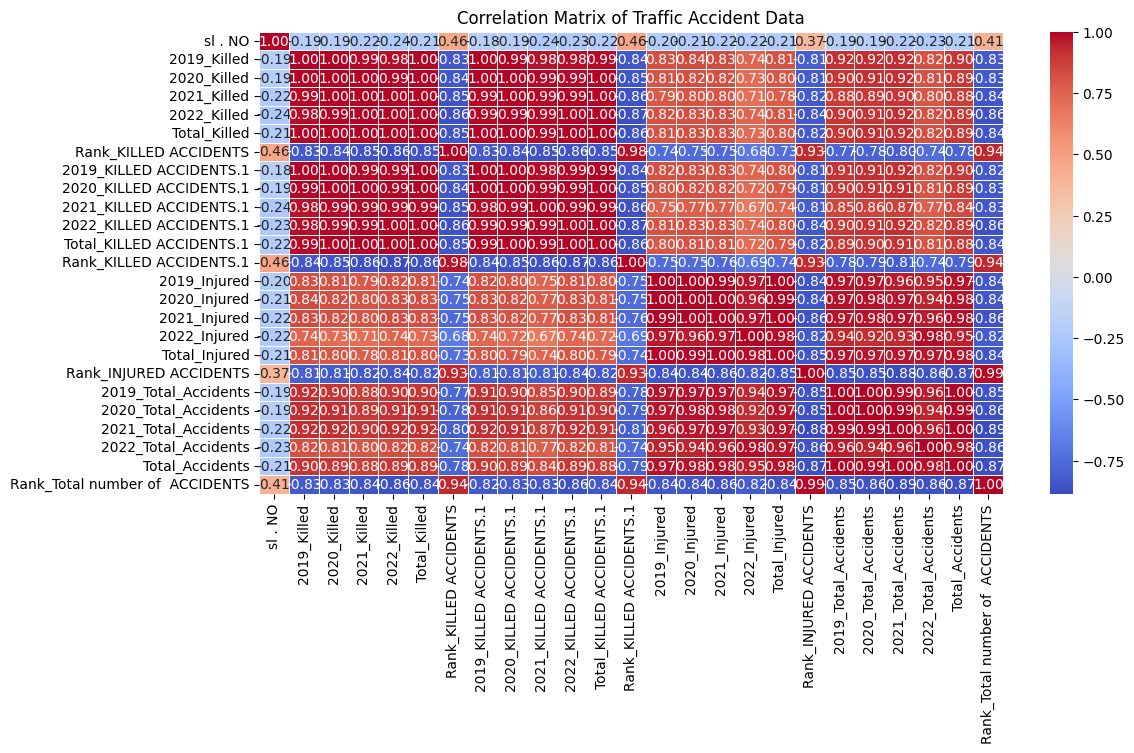

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Traffic Accident Data")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df.columns = df.columns.str.strip()  # Remove extra spaces
features = ['2019_Total_Accidents', '2020_Total_Accidents', '2021_Total_Accidents', '2022_Total_Accidents']
target = 'Total_Accidents'  # Use Total_Accidents as the target

df = df.dropna(subset=features)  # Remove missing values

X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Mean Absolute Error: {mae}")
print(f"📉 Mean Squared Error: {mse}")
print(f"📈 R-Squared Score: {r2}")


📊 Mean Absolute Error: 561.3250000000003
📉 Mean Squared Error: 922526.3353750019
📈 R-Squared Score: 0.9975698515802633


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Best Parameters
print("⚡ Best Parameters:", random_search.best_params_)

# Evaluate Best Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🎯 Optimized MAE: {mae}")
print(f"🎯 Optimized MSE: {mse}")
print(f"🎯 Optimized R² Score: {r2}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
⚡ Best Parameters: {'n_estimators': np.int64(250), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50}
🎯 Optimized MAE: 625.2264999999999
🎯 Optimized MSE: 1393250.1949379998
🎯 Optimized R² Score: 0.9963298557128452


<ipython-input-127-c0000f0e5ccf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='coolwarm')


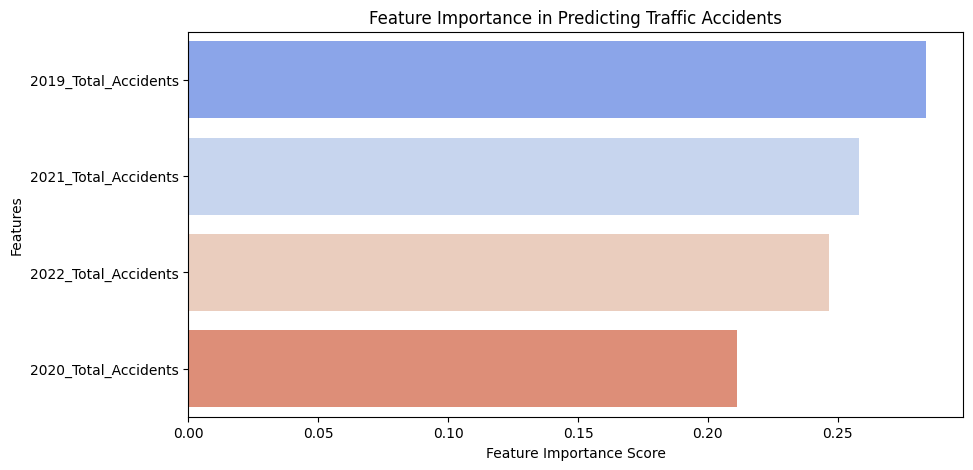

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importances = best_model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='coolwarm')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Traffic Accidents")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
print(df.columns)


Index(['sl__NO', 'StatesUTs', '2019_Killed', '2020_Killed', '2021_Killed',
       '2022_Killed', 'Total_Killed', 'Rank_KILLED_ACCIDENTS',
       '2019_KILLED_ACCIDENTS1', '2020_KILLED_ACCIDENTS1',
       '2021_KILLED_ACCIDENTS1', '2022_KILLED_ACCIDENTS1',
       'Total_KILLED_ACCIDENTS1', 'Rank_KILLED_ACCIDENTS1', '2019_Injured',
       '2020_Injured', '2021_Injured', '2022_Injured', 'Total_Injured',
       'Rank_INJURED_ACCIDENTS', '2019_Total_Accidents',
       '2020_Total_Accidents', '2021_Total_Accidents', '2022_Total_Accidents',
       'Total_Accidents', 'Rank_Total_number_of_ACCIDENTS', 'Latitude',
       'Longitude'],
      dtype='object')


Index(['sl__NO', 'StatesUTs', '2019_Killed', '2020_Killed', '2021_Killed',
       '2022_Killed', 'Total_Killed', 'Rank_KILLED_ACCIDENTS',
       '2019_KILLED_ACCIDENTS1', '2020_KILLED_ACCIDENTS1',
       '2021_KILLED_ACCIDENTS1', '2022_KILLED_ACCIDENTS1',
       'Total_KILLED_ACCIDENTS1', 'Rank_KILLED_ACCIDENTS1', '2019_Injured',
       '2020_Injured', '2021_Injured', '2022_Injured', 'Total_Injured',
       'Rank_INJURED_ACCIDENTS', '2019_Total_Accidents',
       '2020_Total_Accidents', '2021_Total_Accidents', '2022_Total_Accidents',
       'Total_Accidents', 'Rank_Total_number_of_ACCIDENTS', 'Latitude',
       'Longitude'],
      dtype='object')
                 Year  Accident_Count
2023-01-01 2023-12-31   148688.323928
2024-01-01 2024-12-31   149278.447044
2025-01-01 2025-12-31   149173.194888
2026-01-01 2026-12-31   149191.967269
2027-01-01 2027-12-31   149188.619097


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-154-93e576ea65e3>:35: FutureWarning: 'Y' is deprecated and will be remov

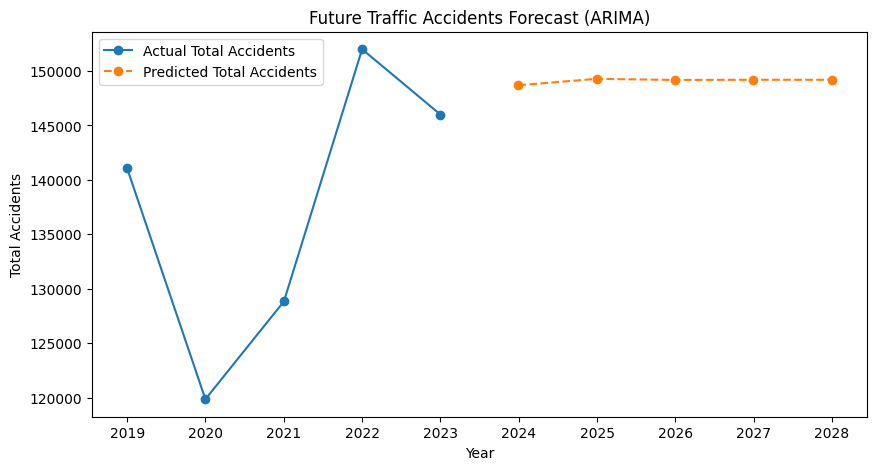

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure column names are correct before proceeding
print(df.columns)

# Manually create a time-series dataset
df_arima = pd.melt(df, id_vars=['StatesUTs'],
                   value_vars=['2019_Total_Accidents', '2020_Total_Accidents',
                               '2021_Total_Accidents', '2022_Total_Accidents'],
                   var_name='Year', value_name='Accident_Count')  # Fix here

# Extract only the numeric year from 'Year' column
df_arima['Year'] = df_arima['Year'].str.extract('(\d+)').astype(int)

# Group by year and sum total accidents (for all states combined)
df_time_series = df_arima.groupby('Year')['Accident_Count'].sum().reset_index()

# Convert 'Year' to datetime format
df_time_series['Year'] = pd.to_datetime(df_time_series['Year'], format='%Y')

# Set 'Year' as index
df_time_series.set_index('Year', inplace=True)

# Fit ARIMA model
model = ARIMA(df_time_series['Accident_Count'], order=(1,1,1))  # Tune (p,d,q) as needed
model_fit = model.fit()

# Predict future trends for the next 5 years
future_years = 5
forecast = model_fit.forecast(steps=future_years)

# Create a DataFrame for predictions
future_dates = pd.date_range(start=df_time_series.index[-1] + pd.DateOffset(years=1),
                             periods=future_years, freq='Y')

forecast_df = pd.DataFrame({'Year': future_dates, 'Accident_Count': forecast})
# Add missing 2023 data with NaN (if it's missing)
if 2023 not in df_time_series.index.year:
    df_time_series.loc[pd.to_datetime('2023')] = 146000

# Print forecast results
print(forecast_df)

# Plot actual vs predicted data
plt.figure(figsize=(10, 5))
plt.plot(df_time_series.index, df_time_series['Accident_Count'], label="Actual Total Accidents", marker='o')
plt.plot(forecast_df['Year'], forecast_df['Accident_Count'], linestyle='dashed', marker='o', label="Predicted Total Accidents")

plt.xlabel("Year")
plt.ylabel("Total Accidents")
plt.title("Future Traffic Accidents Forecast (ARIMA)")
plt.legend()
plt.show()


#state highway dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/state highway dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.head(), df.columns


(  S. No.              State  2019_FATAL ACCIDENTS  2020_FATAL ACCIDENTS  \
 0      1     Andhra Pradesh                  1903                  1580   
 1      2  Arunachal Pradesh                    41                    17   
 2      3              Assam                   617                   596   
 3      4              Bihar                  1316                  1282   
 4      5       Chhattisgarh                  1073                   873   
 
    2021_FATAL ACCIDENTS  2022_FATAL ACCIDENTS  Total_FATAL ACCIDENTS  \
 0                  1781                  1750                   7014   
 1                    36                    38                    132   
 2                   601                   646                   2460   
 3                  1598                  1840                   6036   
 4                   924                   944                   3814   
 
    2019_KILLED ACCIDENTS  2020_KILLED ACCIDENTS  2021_KILLED ACCIDENTS  ...  \
 0                   2

In [ ]:
# Reshaping the dataset to a time-series format

# Define categories for melting
categories = {
    "FATAL_ACCIDENTS": ["2019_FATAL ACCIDENTS", "2020_FATAL ACCIDENTS", "2021_FATAL ACCIDENTS", "2022_FATAL ACCIDENTS"],
    "KILLED_ACCIDENTS": ["2019_KILLED ACCIDENTS", "2020_KILLED ACCIDENTS", "2021_KILLED ACCIDENTS", "2022_KILLED ACCIDENTS"],
    "INJURED_ACCIDENTS": ["2019_INJURED ACCIDENTS", "2020_INJURED ACCIDENTS", "2021_INJURED ACCIDENTS", "2022_INJURED ACCIDENTS"],
    "TOTAL_ACCIDENTS": ["2019_Total number of  ACCIDENTS", "2020_Total number of  ACCIDENTS", "2021_Total number of  ACCIDENTS", "2022_Total number of  ACCIDENTS"]
}

# Melt dataset for each category and combine
df_melted = pd.DataFrame()
for category, cols in categories.items():
    df_temp = df.melt(id_vars=["State"], value_vars=cols, var_name="Year", value_name=category)
    df_temp["Year"] = df_temp["Year"].str[:4]  # Extract year from column names
    if df_melted.empty:
        df_melted = df_temp
    else:
        df_melted = pd.merge(df_melted, df_temp, on=["State", "Year"], how="outer")

# Convert Year to datetime
df_melted["Year"] = pd.to_datetime(df_melted["Year"], format="%Y")

# Show the transformed dataset
df_melted.head()


State       Year  FATAL_ACCIDENTS  KILLED_ACCIDENTS  \
0  Andaman & Nicobar Islands 2019-01-01                5                 5   
1  Andaman & Nicobar Islands 2020-01-01                3                 3   
2  Andaman & Nicobar Islands 2021-01-01                3                 4   
3  Andaman & Nicobar Islands 2022-01-01                2                 2   
4             Andhra Pradesh 2019-01-01             1903              2036   

   INJURED_ACCIDENTS  TOTAL_ACCIDENTS  
0                 74               68  
1                 55               34  
2                 44               31  
3                 39               44  
4               8651             5288

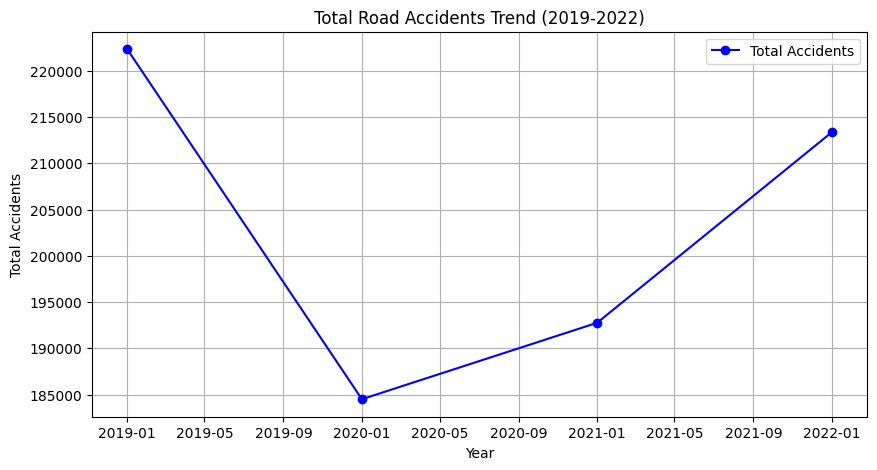

In [ ]:
import matplotlib.pyplot as plt

# Aggregate total accidents across all states for each year
df_trend = df_melted.groupby("Year")["TOTAL_ACCIDENTS"].sum()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(df_trend.index, df_trend.values, marker="o", linestyle="-", color="b", label="Total Accidents")
plt.xlabel("Year")
plt.ylabel("Total Accidents")
plt.title("Total Road Accidents Trend (2019-2022)")
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-158-9798e809be86>:8: FutureWarning: 'Y' is deprecated and will be remove

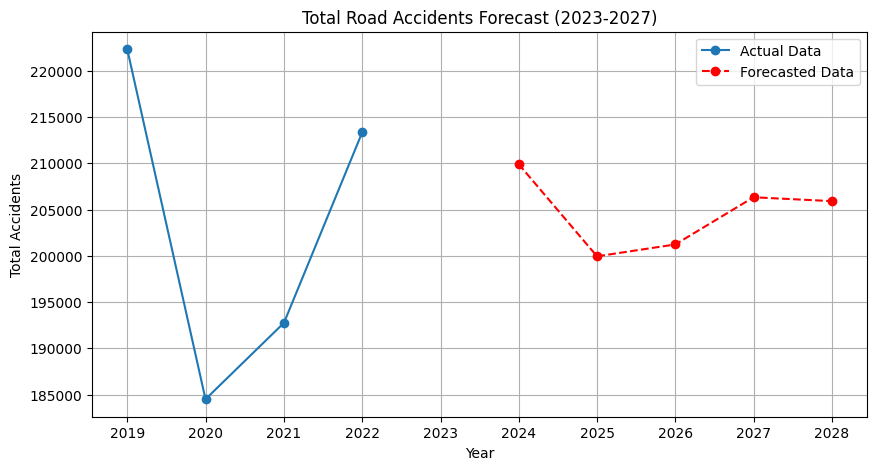

2023-01-01    209932.836292
2024-01-01    199952.355224
2025-01-01    201235.303068
2026-01-01    206336.830935
2027-01-01    205919.013715
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (Auto-Regressive Integrated Moving Average) for forecasting
model = ARIMA(df_trend, order=(2, 1, 2))  # ARIMA(p, d, q) where d=1 for differencing
model_fit = model.fit()

# Forecast for the next 5 years (2023-2027)
future_years = pd.date_range(start="2023", periods=5, freq="Y")
forecast = model_fit.forecast(steps=5)

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(df_trend.index, df_trend.values, marker="o", linestyle="-", label="Actual Data")
plt.plot(future_years, forecast, marker="o", linestyle="--", color="r", label="Forecasted Data")
plt.xlabel("Year")
plt.ylabel("Total Accidents")
plt.title("Total Road Accidents Forecast (2023-2027)")
plt.grid(True)
plt.legend()
plt.show()

# Display forecasted values
forecast


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA

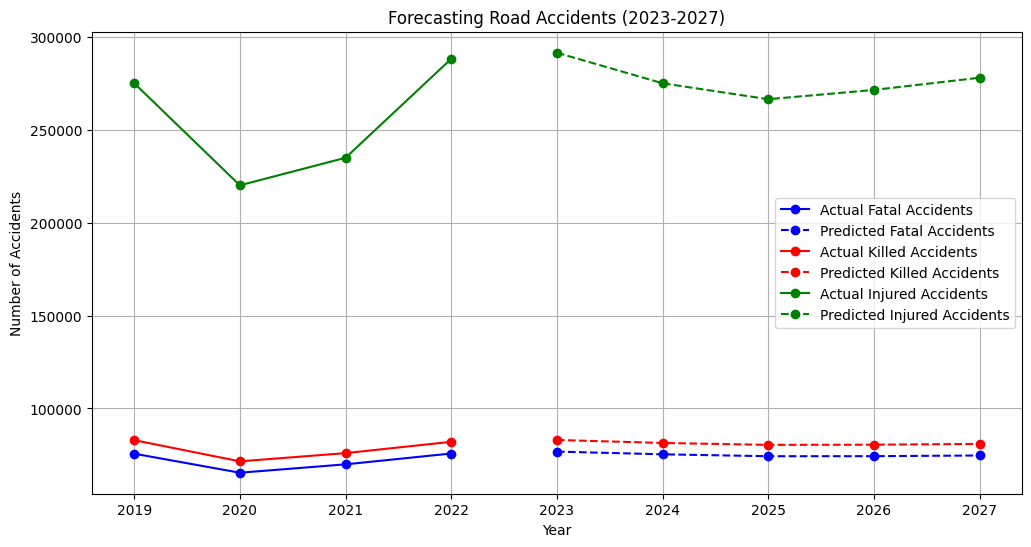

Year  Fatal_Accidents  Killed_Accidents  Injured_Accidents
4  2023     76756.715541      83011.823378      291586.452921
5  2024     75296.726894      81411.487023      275134.666617
6  2025     74260.783648      80373.786578      266548.349866
7  2026     74285.970297      80480.994520      271549.751881
8  2027     74656.594069      80888.713901      278119.794826

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = "/content/state highway dataset.csv"
df = pd.read_csv(file_path)

# Extract relevant columns for forecasting
df_fatal = df[['2019_FATAL ACCIDENTS', '2020_FATAL ACCIDENTS', '2021_FATAL ACCIDENTS', '2022_FATAL ACCIDENTS']].sum()
df_killed = df[['2019_KILLED ACCIDENTS', '2020_KILLED ACCIDENTS', '2021_KILLED ACCIDENTS', '2022_KILLED ACCIDENTS']].sum()
df_injured = df[['2019_INJURED ACCIDENTS', '2020_INJURED ACCIDENTS', '2021_INJURED ACCIDENTS', '2022_INJURED ACCIDENTS']].sum()

# Convert to DataFrame
df_fatal = pd.DataFrame({'Year': [2019, 2020, 2021, 2022], 'Fatal_Accidents': df_fatal.values})
df_killed = pd.DataFrame({'Year': [2019, 2020, 2021, 2022], 'Killed_Accidents': df_killed.values})
df_injured = pd.DataFrame({'Year': [2019, 2020, 2021, 2022], 'Injured_Accidents': df_injured.values})

# Function to forecast using ARIMA
def forecast_arima(df, column_name):
    df.set_index('Year', inplace=True)
    model = sm.tsa.ARIMA(df[column_name], order=(2,1,2))  # ARIMA (p,d,q)
    model_fit = model.fit()
    forecast_years = [2023, 2024, 2025, 2026, 2027]
    forecast = model_fit.forecast(steps=5)
    return forecast_years, forecast

# Forecast for Fatal, Killed, and Injured Accidents
forecast_fatal_years, forecast_fatal_values = forecast_arima(df_fatal, 'Fatal_Accidents')
forecast_killed_years, forecast_killed_values = forecast_arima(df_killed, 'Killed_Accidents')
forecast_injured_years, forecast_injured_values = forecast_arima(df_injured, 'Injured_Accidents')

# Plot Forecasts
plt.figure(figsize=(12, 6))

plt.plot(df_fatal.index, df_fatal['Fatal_Accidents'], marker='o', label="Actual Fatal Accidents", color="blue")
plt.plot(forecast_fatal_years, forecast_fatal_values, marker='o', linestyle="dashed", label="Predicted Fatal Accidents", color="blue")

plt.plot(df_killed.index, df_killed['Killed_Accidents'], marker='o', label="Actual Killed Accidents", color="red")
plt.plot(forecast_killed_years, forecast_killed_values, marker='o', linestyle="dashed", label="Predicted Killed Accidents", color="red")

plt.plot(df_injured.index, df_injured['Injured_Accidents'], marker='o', label="Actual Injured Accidents", color="green")
plt.plot(forecast_injured_years, forecast_injured_values, marker='o', linestyle="dashed", label="Predicted Injured Accidents", color="green")

plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Forecasting Road Accidents (2023-2027)")
plt.legend()
plt.grid()
plt.show()

# Display Forecasted Values
forecast_results = pd.DataFrame({
    "Year": forecast_fatal_years,
    "Fatal_Accidents": forecast_fatal_values,
    "Killed_Accidents": forecast_killed_values,
    "Injured_Accidents": forecast_injured_values
})
forecast_results


In [ ]:
import pandas as pd

# Load the new dataset
file_path = "/content/state highway dataset.csv"
df_highway = pd.read_csv(file_path)

# Display the first few rows
df_highway.head()


S. No.              State  2019_FATAL ACCIDENTS  2020_FATAL ACCIDENTS  \
0      1     Andhra Pradesh                  1903                  1580   
1      2  Arunachal Pradesh                    41                    17   
2      3              Assam                   617                   596   
3      4              Bihar                  1316                  1282   
4      5       Chhattisgarh                  1073                   873   

   2021_FATAL ACCIDENTS  2022_FATAL ACCIDENTS  Total_FATAL ACCIDENTS  \
0                  1781                  1750                   7014   
1                    36                    38                    132   
2                   601                   646                   2460   
3                  1598                  1840                   6036   
4                   924                   944                   3814   

   2019_KILLED ACCIDENTS  2020_KILLED ACCIDENTS  2021_KILLED ACCIDENTS  ...  \
0                   2036                   1704                   1904  ...   
1                     44                     22                     39  ...   
2                    659                    635                    629  ...   
3                   1449                   1409                   1747  ...   
4                   1166                    956                    998  ...   

   2019_INJURED ACCIDENTS  2020_INJURED ACCIDENTS  2021_INJURED ACCIDENTS  \
0                    8651                    7215                    8323   
1                     138                      83                     150   
2                    3625                    2369                    2631   
3                    3296                    3540                    3534   
4                    3451                    3075                    2906   

   2022_INJURED ACCIDENTS  Total_INJURED ACCIDENTS  \
0                    8890                    33079   
1                     106                      477   
2                    2541                    11166   
3                    3063                    13433   
4                    3400                    12832   

   2019_Total number of  ACCIDENTS  2020_Total number of  ACCIDENTS  \
0                             5288                             4508   
1                               90                               39   
2                             2102                             1752   
3                             1945                             1711   
4                             3010                             2171   

   2021_Total number of  ACCIDENTS  2022_Total number of  ACCIDENTS  Total  
0                             4704                             4843  19343  
1                               75                               71    275  
2                             1782                             1758   7394  
3                             2115                             2428   8199  
4                             2166                             2140   9487  

[5 rows x 22 columns]

In [ ]:
# Rename columns for consistency
df_highway.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

# Convert the dataset into a long-format time-series for analysis
df_melted = pd.melt(
    df_highway,
    id_vars=["State"],
    value_vars=[
        "2019_Total_number_of__ACCIDENTS",
        "2020_Total_number_of__ACCIDENTS",
        "2021_Total_number_of__ACCIDENTS",
        "2022_Total_number_of__ACCIDENTS",
    ],
    var_name="Year",
    value_name="Total_Accidents",
)

# Extract only the year from column names
df_melted["Year"] = df_melted["Year"].str.extract(r"(\d{4})").astype(int)

# Display transformed data
df_melted.head()


State  Year  Total_Accidents
0     Andhra Pradesh  2019             5288
1  Arunachal Pradesh  2019               90
2              Assam  2019             2102
3              Bihar  2019             1945
4       Chhattisgarh  2019             3010

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Aggregate total accidents per year (summed over all states)
df_yearly = df_melted.groupby("Year")["Total_Accidents"].sum().reset_index()

# Fit an ARIMA model for forecasting
model = ARIMA(df_yearly["Total_Accidents"], order=(2, 1, 2))  # (p,d,q) parameters
model_fit = model.fit()

# Predict future values for 2023-2027
future_years = np.arange(2023, 2028)
future_forecast = model_fit.forecast(steps=5)

# Create a DataFrame for forecasted values
df_forecast = pd.DataFrame({"Year": future_years, "Predicted_Accidents": future_forecast})
df_forecast


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Year  Predicted_Accidents
4  2023        209932.836292
5  2024        199952.355224
6  2025        201235.303068
7  2026        206336.830935
8  2027        205919.013715

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load your cleaned dataset (assuming df_melted is already prepared)
df_yearly = df_melted.groupby("Year")["Total_Accidents"].sum().reset_index()

# Fit an ARIMA model for forecasting
model = ARIMA(df_yearly["Total_Accidents"], order=(2, 1, 2))  # (p,d,q) parameters
model_fit = model.fit()

# Predict future values for 2023-2027
future_years = np.arange(2023, 2028)
future_forecast = model_fit.forecast(steps=5)

# Create a DataFrame for forecasted values
df_forecast = pd.DataFrame({"Year": future_years, "Predicted_Accidents": future_forecast})

print(df_forecast)


   Year  Predicted_Accidents
4  2023        209932.836292
5  2024        199952.355224
6  2025        201235.303068
7  2026        206336.830935
8  2027        205919.013715


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


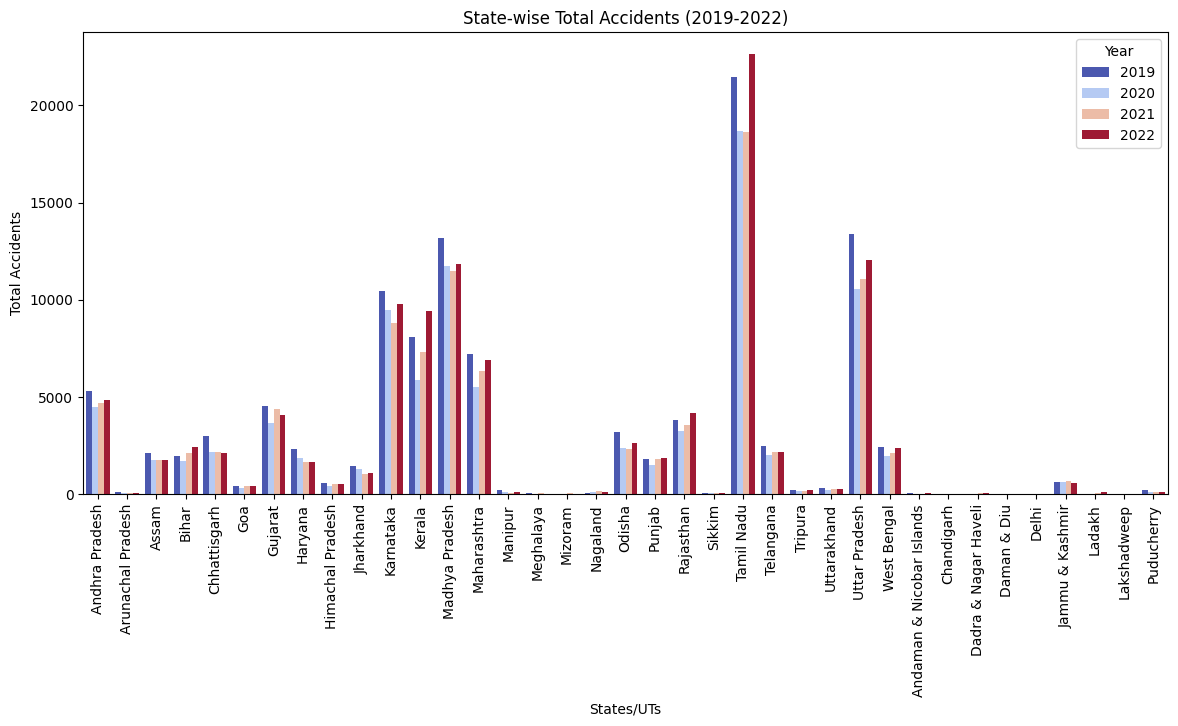

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x="State", y="Total_Accidents", hue="Year", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("State-wise Total Accidents (2019-2022)")
plt.xlabel("States/UTs")
plt.ylabel("Total Accidents")
plt.legend(title="Year")
plt.show()


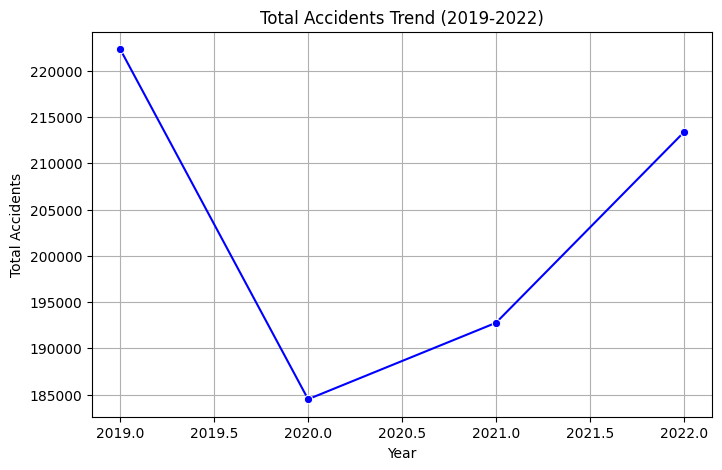

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_melted.groupby("Year")["Total_Accidents"].sum().reset_index(), x="Year", y="Total_Accidents", marker="o", color="b")
plt.title("Total Accidents Trend (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Total Accidents")
plt.grid(True)
plt.show()


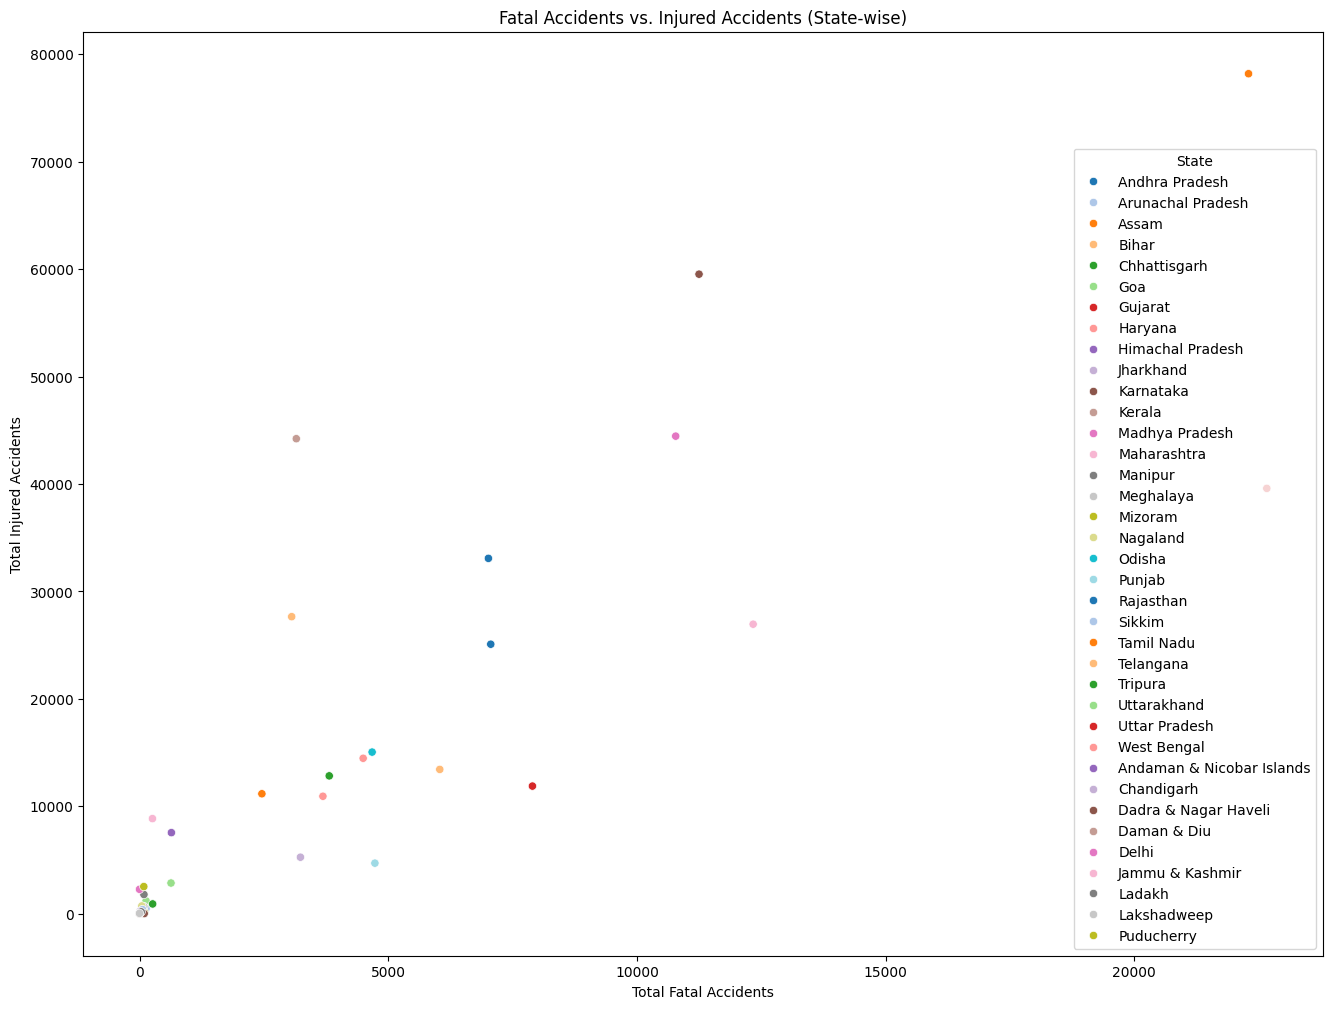

In [ ]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x="Total_FATAL ACCIDENTS", y="Total_INJURED ACCIDENTS", hue="State", palette="tab20")
plt.title("Fatal Accidents vs. Injured Accidents (State-wise)")
plt.xlabel("Total Fatal Accidents")
plt.ylabel("Total Injured Accidents")
plt.show()


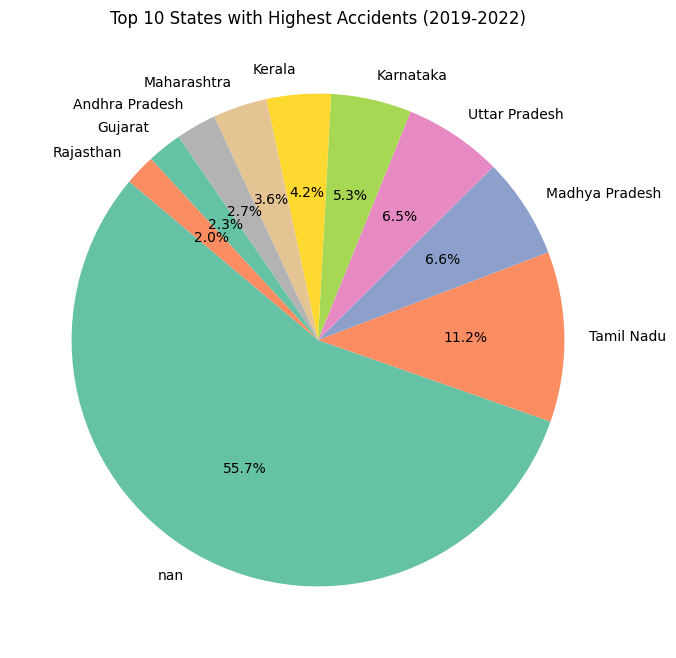

In [ ]:
df_top_states = df.sort_values("Total", ascending=False).head(10)  # Top 10 states
plt.figure(figsize=(8, 8))
plt.pie(df_top_states["Total"], labels=df_top_states["State"], autopct="%1.1f%%", colors=sns.color_palette("Set2"), startangle=140)
plt.title("Top 10 States with Highest Accidents (2019-2022)")
plt.show()


In [ ]:
df.rename(columns={"Total_Accidents": "Total"}, inplace=True)


In [ ]:
print(df.columns)


Index(['S._No.', 'State', '2019_FATAL_ACCIDENTS', '2020_FATAL_ACCIDENTS',
       '2021_FATAL_ACCIDENTS', '2022_FATAL_ACCIDENTS', 'Total_FATAL_ACCIDENTS',
       '2019_KILLED_ACCIDENTS', '2020_KILLED_ACCIDENTS',
       '2021_KILLED_ACCIDENTS', '2022_KILLED_ACCIDENTS',
       'Total_KILLED_ACCIDENTS', '2019_INJURED_ACCIDENTS',
       '2020_INJURED_ACCIDENTS', '2021_INJURED_ACCIDENTS',
       '2022_INJURED_ACCIDENTS', 'Total_INJURED_ACCIDENTS',
       '2019_Total_number_of__ACCIDENTS', '2020_Total_number_of__ACCIDENTS',
       '2021_Total_number_of__ACCIDENTS', '2022_Total_number_of__ACCIDENTS',
       'Total'],
      dtype='object')


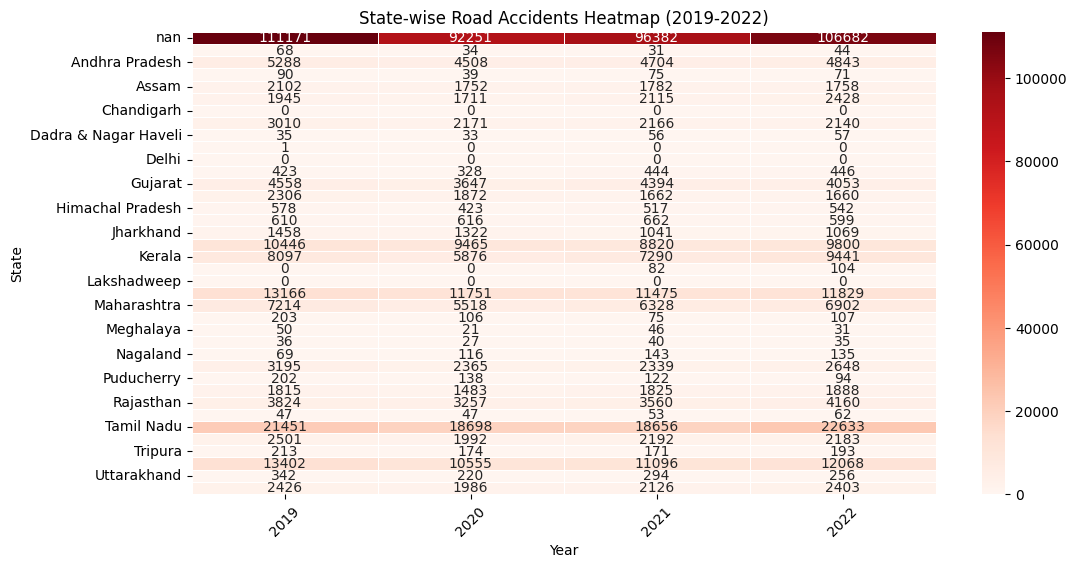

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
heatmap_data = df_melted.pivot(index="State", columns="Year", values="Total_Accidents")
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt="d", linewidths=0.5)

plt.title("State-wise Road Accidents Heatmap (2019-2022)")
plt.xlabel("Year")
plt.ylabel("State")
plt.xticks(rotation=45)
plt.show()


<ipython-input-193-a020a48a827b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="State", y="Total_Accidents", palette="coolwarm")


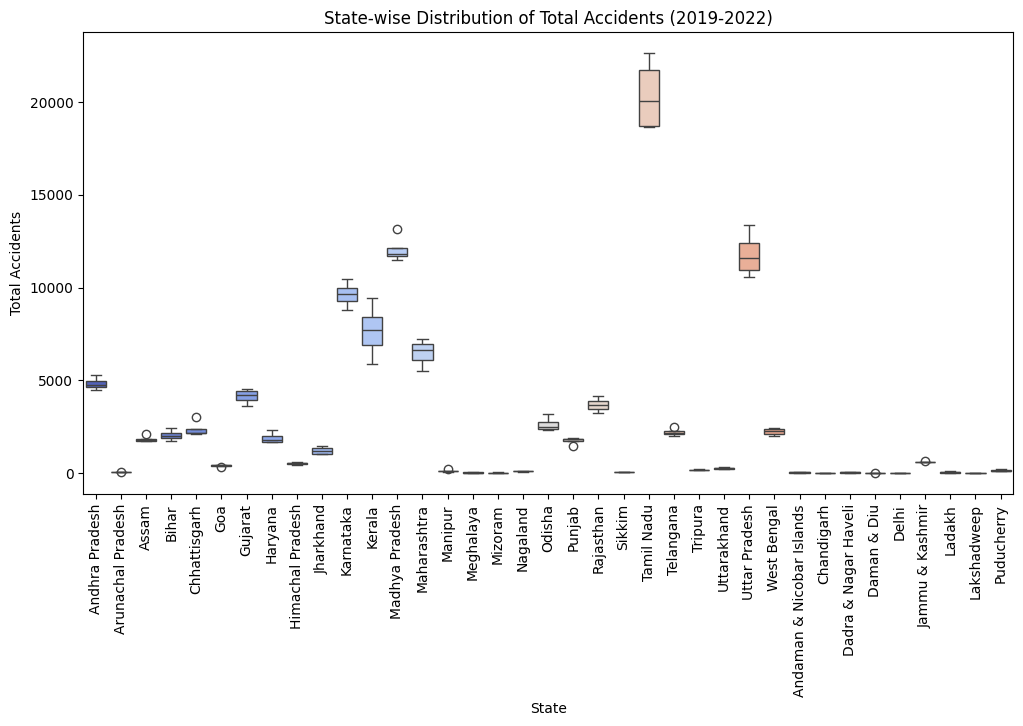

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="State", y="Total_Accidents", palette="coolwarm")

plt.xticks(rotation=90)
plt.title("State-wise Distribution of Total Accidents (2019-2022)")
plt.xlabel("State")
plt.ylabel("Total Accidents")
plt.show()


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("krutarthhd/india-geojson-file")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/krutarthhd/india-geojson-file/versions/2


In [ ]:
import os

geojson_dir = "/root/.cache/kagglehub/datasets/krutarthhd/india-geojson-file/versions/2"
print(os.listdir(geojson_dir))  # List files in the directory


['state', 'district', 'README.md', 'taluk', 'LICENSE']


In [ ]:
import geopandas as gpd

geojson_path = "/root/.cache/kagglehub/datasets/krutarthhd/india-geojson-file/versions/2/state/india_state.geojson"
  # Update the filename if needed
gdf = gpd.read_file(geojson_path)

print(gdf.head())  # Check the first few rows


   ID_0  ISO NAME_0  ID_1               NAME_1 NL_NAME_1  \
0   105  IND  India     1  Andaman and Nicobar      None   
1   105  IND  India     2       Andhra Pradesh      None   
2   105  IND  India     3    Arunachal Pradesh      None   
3   105  IND  India     4                Assam      None   
4   105  IND  India     5                Bihar      None   

                                           VARNAME_1          TYPE_1  \
0  Andaman & Nicobar Islands|Andaman et Nicobar|I...  Union Territor   
1                                               None           State   
2  Agence de la Frontire du Nord-Est(French-obsol...           State   
3                                               None           State   
4                                               None           State   

         ENGTYPE_1                                           geometry  
0  Union Territory  MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
1            State  MULTIPOLYGON (((80.27458 13.45958, 80.2745

In [ ]:
print(gdf.columns)  # List all column names in GeoJSON file


Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'geometry'],
      dtype='object')


In [ ]:
print(df.columns)


Index(['S._No.', 'State', '2019_FATAL_ACCIDENTS', '2020_FATAL_ACCIDENTS',
       '2021_FATAL_ACCIDENTS', '2022_FATAL_ACCIDENTS', 'Total_FATAL_ACCIDENTS',
       '2019_KILLED_ACCIDENTS', '2020_KILLED_ACCIDENTS',
       '2021_KILLED_ACCIDENTS', '2022_KILLED_ACCIDENTS',
       'Total_KILLED_ACCIDENTS', '2019_INJURED_ACCIDENTS',
       '2020_INJURED_ACCIDENTS', '2021_INJURED_ACCIDENTS',
       '2022_INJURED_ACCIDENTS', 'Total_INJURED_ACCIDENTS',
       '2019_Total_number_of__ACCIDENTS', '2020_Total_number_of__ACCIDENTS',
       '2021_Total_number_of__ACCIDENTS', '2022_Total_number_of__ACCIDENTS',
       'Total'],
      dtype='object')


In [ ]:
print(gdf.head())  # Check if accident data is merged correctly


   ID_0  ISO NAME_0  ID_1             NAME_1 NL_NAME_1  \
0   105  IND  India     2     Andhra Pradesh      None   
1   105  IND  India     3  Arunachal Pradesh      None   
2   105  IND  India     4              Assam      None   
3   105  IND  India     5              Bihar      None   
4   105  IND  India     6         Chandigarh      None   

                                           VARNAME_1          TYPE_1  \
0                                               None           State   
1  Agence de la Frontire du Nord-Est(French-obsol...           State   
2                                               None           State   
3                                               None           State   
4                                               None  Union Territor   

         ENGTYPE_1                                           geometry  ...  \
0            State  MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...  ...   
1            State  POLYGON ((96.15778 29.3831, 96.1638 29.376

In [ ]:
import json
with open(geojson_path, 'r') as f:
    geojson_data = json.load(f)

print(geojson_data['features'][0].keys())  # Check the keys in one of the features


dict_keys(['type', 'properties', 'geometry'])


In [ ]:
import folium
import geopandas as gpd
import pandas as pd  # Assuming you need pandas for reading the accident dataset
import json

# Load accident dataset (ensure it's correctly loaded)
df = pd.read_csv("/content/state highway dataset.csv")  # Modify this line to load your dataset

# Load India GeoJSON file (Ensure you have the correct path)
geojson_path = "/root/.cache/kagglehub/datasets/krutarthhd/india-geojson-file/versions/2/state/india_state.geojson"  # Replace with actual file path


# Load GeoJSON data
gdf = gpd.read_file(geojson_path)

# Debug: Check the first few rows of df and gdf
print(df.head())  # Check accident dataset
print(gdf.head())  # Check GeoDataFrame

# Merge the accident dataset with GeoJSON on state name
gdf = gdf.merge(df, left_on="NAME_1", right_on="State")

# Debug: Check merged GeoDataFrame
print(gdf.head())  # Verify merge was successful

# Create a Folium map centered on India
m = folium.Map(location=[22, 80], zoom_start=5)

# Add Choropleth Layer
folium.Choropleth(
    geo_data=geojson_path,
    name="choropleth",
    data=df,
    columns=["State", "Total"],  # Ensure 'Total' column exists in df
    key_on="feature.properties.NAME_1",  # Ensure key matches GeoJSON
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Accidents",
).add_to(m)

# Save the map as an HTML file
m.save("statewise_accidents_map.html")

# If you're in a Jupyter notebook, just display the map
# m  # Uncomment this if running in Jupyter to see map directly


  S. No.              State  2019_FATAL ACCIDENTS  2020_FATAL ACCIDENTS  \
0      1     Andhra Pradesh                  1903                  1580   
1      2  Arunachal Pradesh                    41                    17   
2      3              Assam                   617                   596   
3      4              Bihar                  1316                  1282   
4      5       Chhattisgarh                  1073                   873   

   2021_FATAL ACCIDENTS  2022_FATAL ACCIDENTS  Total_FATAL ACCIDENTS  \
0                  1781                  1750                   7014   
1                    36                    38                    132   
2                   601                   646                   2460   
3                  1598                  1840                   6036   
4                   924                   944                   3814   

   2019_KILLED ACCIDENTS  2020_KILLED ACCIDENTS  2021_KILLED ACCIDENTS  ...  \
0                   2036             

In [ ]:
# m

#roadbased features 2022 dataset


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/roadbased features 2022.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   S.No.                               37 non-null     float64
 1   States/Uts                          38 non-null     object 
 2   Number of Accidents_ Straight Road  38 non-null     int64  
 3   Persons Killed_ Straight Road       38 non-null     int64  
 4   Greviously Injured_ Straight Road   38 non-null     int64  
 5   Minor Injured_ Straight Road        38 non-null     int64  
 6   Total Injured_ Straight Road        38 non-null     int64  
 7   Number of Accidents_Curved Road     38 non-null     int64  
 8   Persons Killed_Curved Road          38 non-null     int64  
 9   Greviously Injured_Curved Road      38 non-null     int64  
 10  Minor Injured_Curved Road           38 non-null     int64  
 11  Total Injured_Curved Road           38 non-null

(None,
    S.No.         States/Uts  Number of Accidents_ Straight Road  \
 0    1.0     Andhra Pradesh                               16441   
 1    2.0  Arunachal Pradesh                                  19   
 2    3.0              Assam                                2882   
 3    4.0              Bihar                                6621   
 4    5.0       Chhattisgarh                                9098   
 
    Persons Killed_ Straight Road  Greviously Injured_ Straight Road  \
 0                           6421                               4060   
 1                             10                                 11   
 2                           1329                               1880   
 3                           5490                               4299   
 4                           3807                               1289   
 
    Minor Injured_ Straight Road  Total Injured_ Straight Road  \
 0                         12292                         16352   
 1               

In [ ]:
# Drop the S.No. column (if exists)
df_cleaned = df.drop(columns=["S.No."], errors="ignore")

# Standardize column names (remove extra spaces, replace spaces with underscores)
df_cleaned.columns = (
    df_cleaned.columns.str.strip()
    .str.replace(r'\s+', '_', regex=True)
    .str.lower()
)

# Fill missing values with 0 (assuming missing means no reported cases)
df_cleaned = df_cleaned.fillna(0)

# Display cleaned dataset info
df_cleaned.info()
print(df_cleaned.columns.tolist())  # Check column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   states/uts                          38 non-null     object
 1   number_of_accidents__straight_road  38 non-null     int64 
 2   persons_killed__straight_road       38 non-null     int64 
 3   greviously_injured__straight_road   38 non-null     int64 
 4   minor_injured__straight_road        38 non-null     int64 
 5   total_injured__straight_road        38 non-null     int64 
 6   number_of_accidents_curved_road     38 non-null     int64 
 7   persons_killed_curved_road          38 non-null     int64 
 8   greviously_injured_curved_road      38 non-null     int64 
 9   minor_injured_curved_road           38 non-null     int64 
 10  total_injured_curved_road           38 non-null     int64 
 11  number_of_accidents_bridge          38 non-null     int64 
 

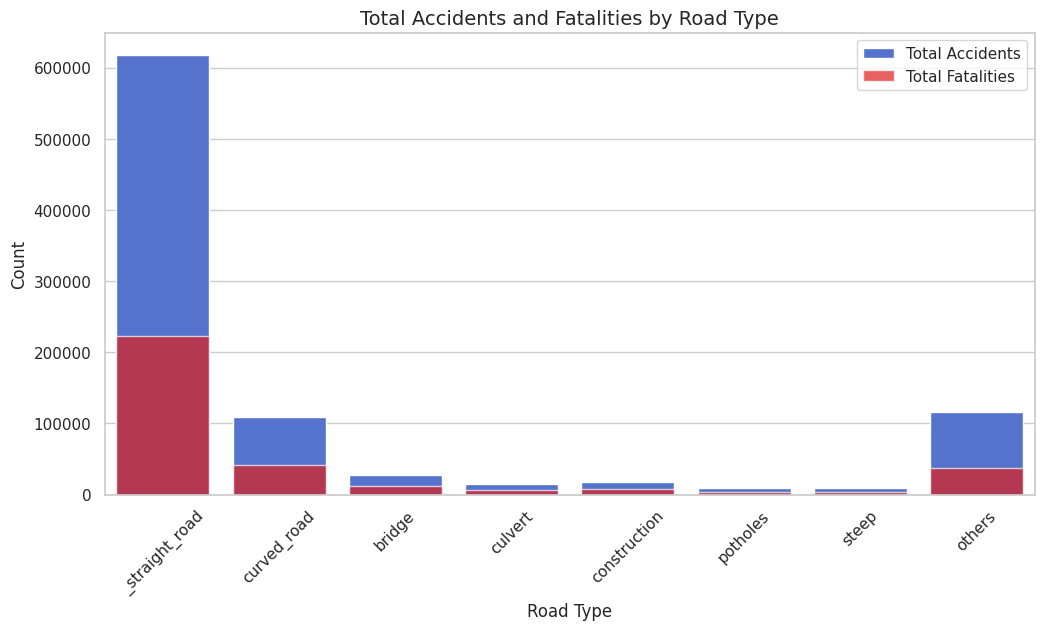

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Define road types
road_types = [
    "_straight_road", "curved_road", "bridge", "culvert",
    "construction", "potholes", "steep", "others"
]

# Aggregate total accidents and fatalities by road type
accidents = [df_cleaned[f"number_of_accidents_{road}"].sum() for road in road_types]
fatalities = [df_cleaned[f"persons_killed_{road}"].sum() for road in road_types]

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=road_types, y=accidents, color="royalblue", label="Total Accidents")
sns.barplot(x=road_types, y=fatalities, color="red", alpha=0.7, label="Total Fatalities")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Road Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Total Accidents and Fatalities by Road Type", fontsize=14)
plt.legend()
plt.show()


<ipython-input-253-893b3dc526d3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states["states/uts"], x=top_states["total_accidents"], palette="viridis")


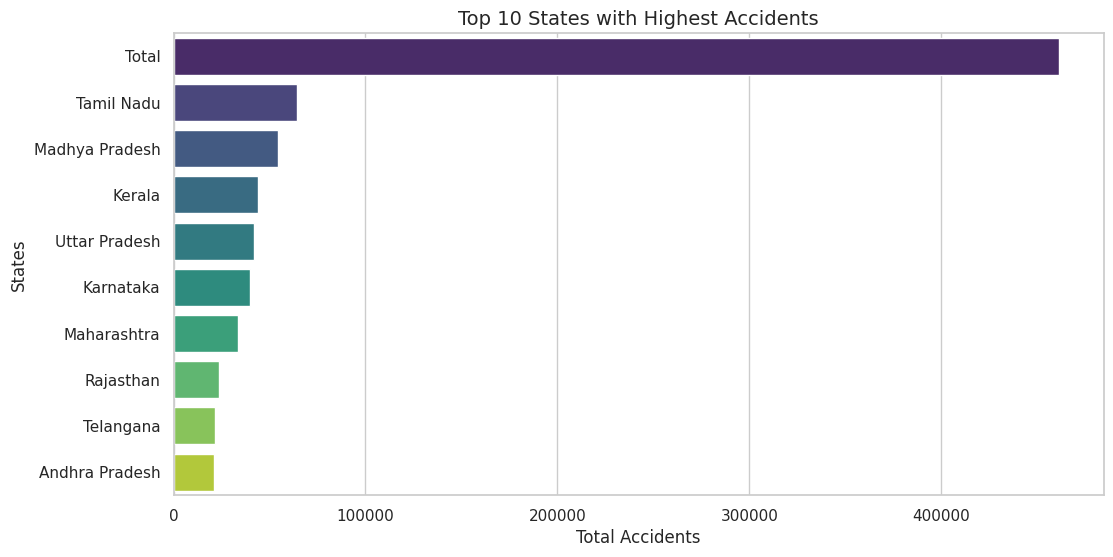

In [ ]:
# Compute total accidents per state
df_cleaned["total_accidents"] = df_cleaned[
    [f"number_of_accidents_{road}" for road in road_types]
].sum(axis=1)

# Sort states by highest number of accidents
top_states = df_cleaned.sort_values("total_accidents", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_states["states/uts"], x=top_states["total_accidents"], palette="viridis")
plt.xlabel("Total Accidents", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.title("Top 10 States with Highest Accidents", fontsize=14)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Select features (accident data for different road types)
X = df_cleaned[[f"number_of_accidents_{road}" for road in road_types]]
y = df_cleaned["total_accidents"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1.0582823506410932e-10


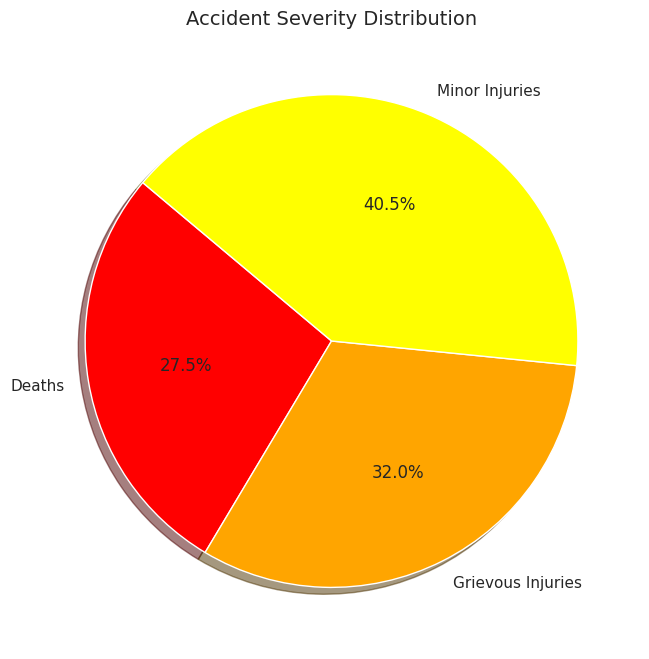

In [ ]:
import matplotlib.pyplot as plt

# Aggregate totals
total_killed = df_cleaned[[f"persons_killed_{road}" for road in road_types]].sum().sum()
total_grievous = df_cleaned[[f"greviously_injured_{road}" for road in road_types]].sum().sum()
total_minor = df_cleaned[[f"minor_injured_{road}" for road in road_types]].sum().sum()

# Labels & Data
labels = ["Deaths", "Grievous Injuries", "Minor Injuries"]
sizes = [total_killed, total_grievous, total_minor]
colors = ["red", "orange", "yellow"]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, shadow=True)
plt.title("Accident Severity Distribution", fontsize=14)
plt.show()


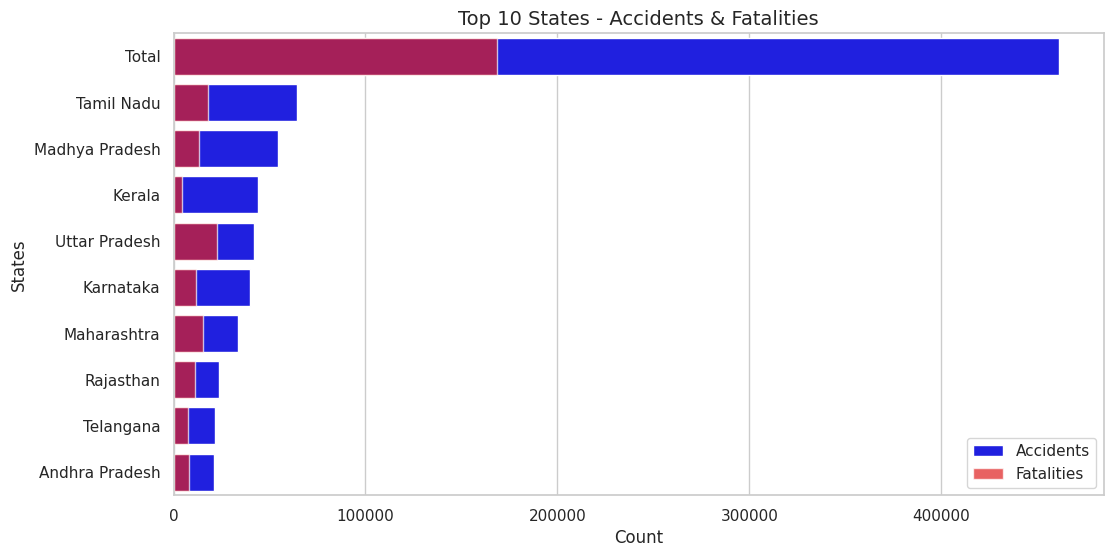

In [ ]:
import seaborn as sns

# Compute total fatalities per state
df_cleaned["total_fatalities"] = df_cleaned[
    [f"persons_killed_{road}" for road in road_types]
].sum(axis=1)

# Get top 10 states
top_states = df_cleaned.sort_values("total_accidents", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_states["states/uts"], x=top_states["total_accidents"], color="blue", label="Accidents")
sns.barplot(y=top_states["states/uts"], x=top_states["total_fatalities"], color="red", alpha=0.7, label="Fatalities")

# Labels
plt.xlabel("Count", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.title("Top 10 States - Accidents & Fatalities", fontsize=14)
plt.legend()
plt.show()


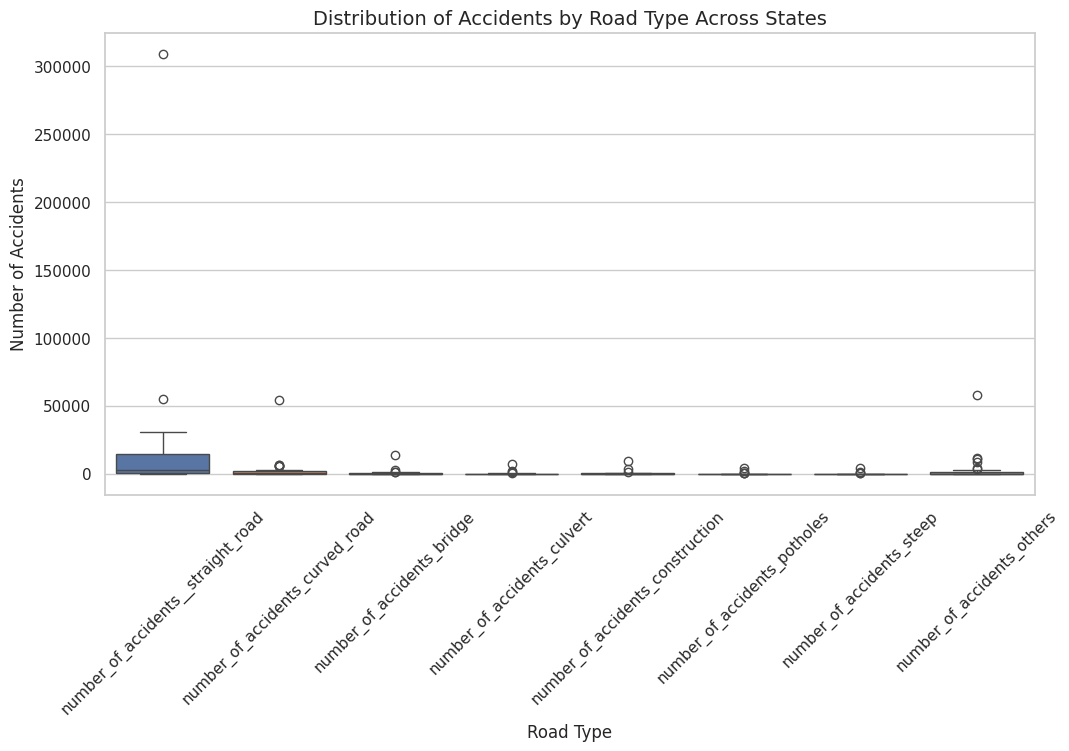

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[[f"number_of_accidents_{road}" for road in road_types]])
plt.xticks(rotation=45)
plt.xlabel("Road Type", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Distribution of Accidents by Road Type Across States", fontsize=14)
plt.show()


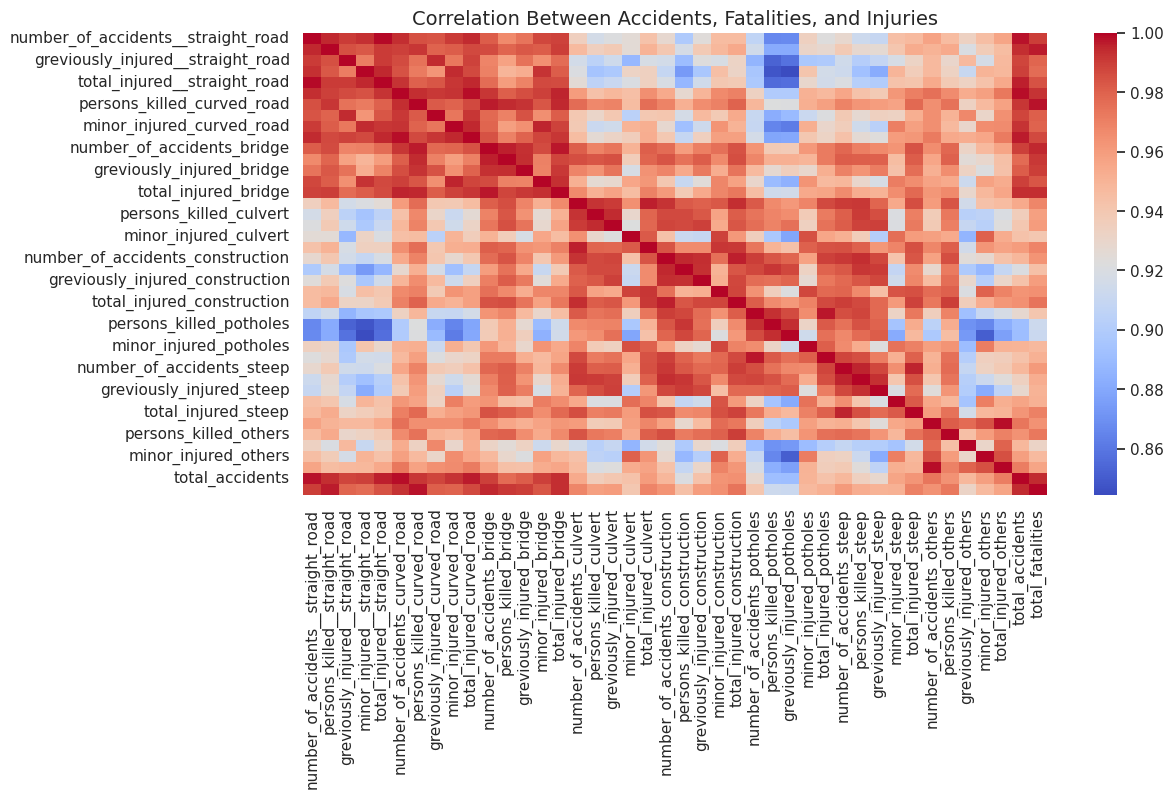

In [ ]:
import numpy as np

# Select numerical columns
num_cols = df_cleaned.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = num_cols.corr()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Between Accidents, Fatalities, and Injuries", fontsize=14)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Aggregate total accidents across all road types
df_cleaned["total_accidents"] = df_cleaned[
    [col for col in df_cleaned.columns if "number_of_accidents" in col]
].sum(axis=1)

# Assume yearly data, generate monthly trend
monthly_accidents = df_cleaned["total_accidents"].sum() / 12  # Distribute evenly over 12 months
date_range = pd.date_range(start="2022-01", periods=12, freq="M")  # Simulating 12 months

# Create time-series DataFrame
ts_data = pd.DataFrame({"date": date_range, "accidents": np.random.normal(monthly_accidents, 500, 12)})
ts_data.set_index("date", inplace=True)

# Display sample data
print(ts_data.head())


               accidents
date                    
2022-01-31  76021.732340
2022-02-28  77133.664843
2022-03-31  77760.725018
2022-04-30  76562.955253
2022-05-31  76767.722118


<ipython-input-260-ff7e001fc40e>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2022-01", periods=12, freq="M")  # Simulating 12 months


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
<ipython-input-261-b603d389d133>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  futur

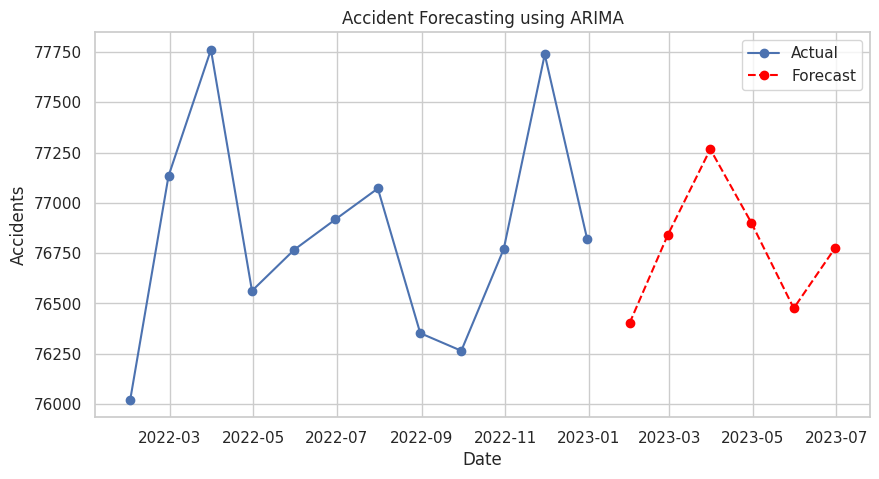

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA Model
model = ARIMA(ts_data["accidents"], order=(2,1,2))  # ARIMA(p,d,q)
model_fit = model.fit()

# Predict the next 6 months
forecast = model_fit.forecast(steps=6)

# Create future dates
future_dates = pd.date_range(start=ts_data.index[-1], periods=7, freq="M")[1:]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(ts_data.index, ts_data["accidents"], label="Actual", marker="o")
plt.plot(future_dates, forecast, label="Forecast", linestyle="dashed", marker="o", color="red")
plt.xlabel("Date")
plt.ylabel("Accidents")
plt.title("Accident Forecasting using ARIMA")
plt.legend()
plt.show()


In [ ]:
# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              accidents   No. Observations:                   12
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -82.583
Date:                Sat, 22 Mar 2025   AIC                            175.167
Time:                        10:19:08   BIC                            177.156
Sample:                    01-31-2022   HQIC                           173.913
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0917      0.305      0.301      0.763      -0.505       0.689
ar.L2         -0.9208      0.356     -2.586      0.010      -1.619      -0.223
ma.L1         -0.0430      0.294     -0.146      0.8

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/weather dataset.csv"
df_weather = pd.read_csv(file_path)

# Display basic information
df_weather.info()
df_weather.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   S.No                      38 non-null     object
 1   State                     37 non-null     object
 2   Total_Accidents_sun       38 non-null     int64 
 3   Person_Killed_sun         38 non-null     int64 
 4   Grievously_Injured_sun    38 non-null     int64 
 5   Minor_Injury_sun          38 non-null     int64 
 6   Total_Injured_sun         38 non-null     int64 
 7   Total_Accidents_rain      38 non-null     int64 
 8   Person_Killed_rain        38 non-null     int64 
 9   Grievously_Injured_rain   38 non-null     int64 
 10  Minor_Injury_rain         38 non-null     int64 
 11  Total_Injured_rain        38 non-null     int64 
 12  Total_Accidents_fog       38 non-null     int64 
 13   Person_Killed_fog        38 non-null     int64 
 14  Grievously_Injured_fog    38

S.No              State  Total_Accidents_sun  Person_Killed_sun  \
0    1     Andhra Pradesh                16246               6295   
1    2  Arunachal Pradesh                  122                 77   
2    3              Assam                 3322               1462   
3    4              Bihar                 6244               5213   
4    5       Chhattisgarh                 9993               4303   

   Grievously_Injured_sun  Minor_Injury_sun  Total_Injured_sun  \
0                    4068             12445              16513   
1                      66                25                 91   
2                    2306               260               2566   
3                    3981               102               4083   
4                    1339              7445               8784   

   Total_Accidents_rain  Person_Killed_rain  Grievously_Injured_rain  ...  \
0                  1102                 438                      394  ...   
1                    37                  22                       25  ...   
2                  1399                 582                      980  ...   
3                  2041                1644                     1275  ...   
4                  1450                 615                      206  ...   

   Total_Accidents_hail  Person_Killed_hail  Grievously_Injured_hail  \
0                    49                  13                       13   
1                    29                  19                       16   
2                   334                 141                      294   
3                    20                  17                       12   
4                    21                  20                        4   

   Minor_Injury_hail  Total_Injured_hail  Total_Accidents_other  \
0                 30                  43                   2196   
1                  1                  17                      0   
2                 20                 314                    766   
3                  0                  12                    221   
4                  9                  13                   1335   

   Person_Killed_other  Grievously_Injured_other  Minor_Injury_other  \
0                  886                       714                1352   
1                    0                         0                   0   
2                  345                       575                  72   
3                  182                       159                   3   
4                  669                       221                1027   

   Total_Injured_other  
0                 2066  
1                    0  
2                  647  
3                  162  
4                 1248  

[5 rows x 27 columns]

In [ ]:
# Drop S.No. column
df_weather_cleaned = df_weather.drop(columns=["S.No"], errors="ignore")

# Standardize column names (remove spaces, replace with underscores)
df_weather_cleaned.columns = (
    df_weather_cleaned.columns.str.strip().str.replace(r'\s+', '_', regex=True).str.lower()
)

# Fill missing values with 0 (assuming missing means no reported cases)
df_weather_cleaned = df_weather_cleaned.fillna(0)

# Display cleaned dataset info
df_weather_cleaned.info()
print(df_weather_cleaned.columns.tolist())  # Check column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   state                     38 non-null     object
 1   total_accidents_sun       38 non-null     int64 
 2   person_killed_sun         38 non-null     int64 
 3   grievously_injured_sun    38 non-null     int64 
 4   minor_injury_sun          38 non-null     int64 
 5   total_injured_sun         38 non-null     int64 
 6   total_accidents_rain      38 non-null     int64 
 7   person_killed_rain        38 non-null     int64 
 8   grievously_injured_rain   38 non-null     int64 
 9   minor_injury_rain         38 non-null     int64 
 10  total_injured_rain        38 non-null     int64 
 11  total_accidents_fog       38 non-null     int64 
 12  person_killed_fog         38 non-null     int64 
 13  grievously_injured_fog    38 non-null     int64 
 14  minor_injury_fog          38

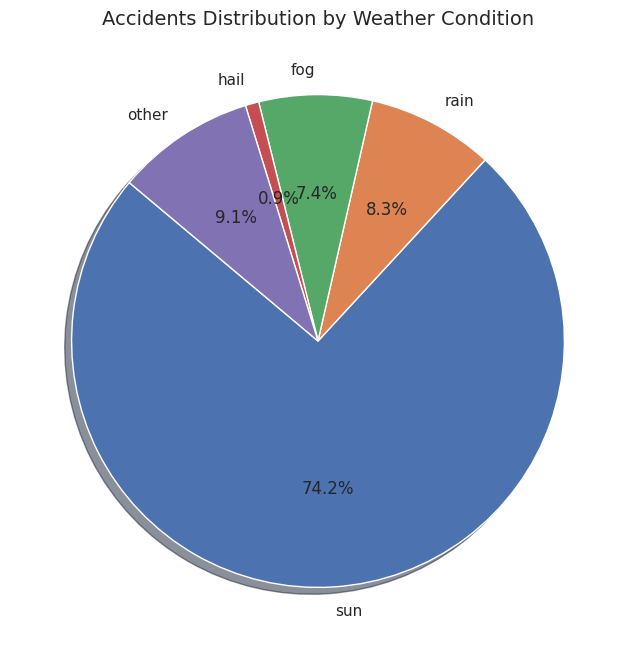

In [ ]:
import matplotlib.pyplot as plt

# Aggregate total accidents across all weather conditions
weather_types = ["sun", "rain", "fog", "hail", "other"]
accident_totals = [df_weather_cleaned[f"total_accidents_{wt}"].sum() for wt in weather_types]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(accident_totals, labels=weather_types, autopct="%1.1f%%", startangle=140, shadow=True)
plt.title("Accidents Distribution by Weather Condition", fontsize=14)
plt.show()


<ipython-input-274-405a8bb3b0f0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states_weather["state"], x=top_states_weather["total_accidents"], palette="coolwarm")


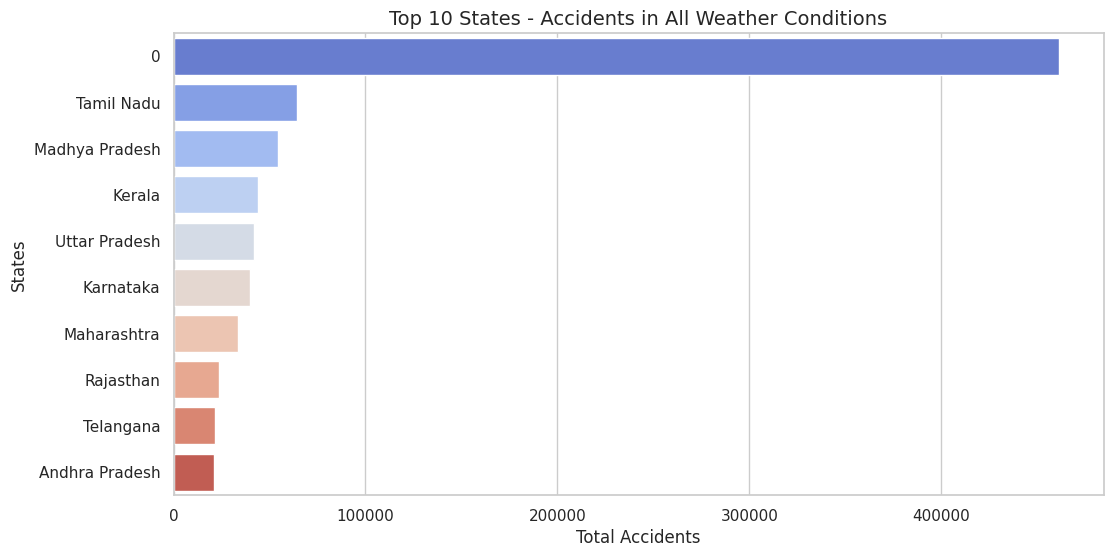

In [ ]:
import seaborn as sns

# Compute total accidents per state
df_weather_cleaned["total_accidents"] = df_weather_cleaned[
    [f"total_accidents_{wt}" for wt in weather_types]
].sum(axis=1)

# Get top 10 states
top_states_weather = df_weather_cleaned.sort_values("total_accidents", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_states_weather["state"], x=top_states_weather["total_accidents"], palette="coolwarm")
plt.xlabel("Total Accidents", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.title("Top 10 States - Accidents in All Weather Conditions", fontsize=14)
plt.show()


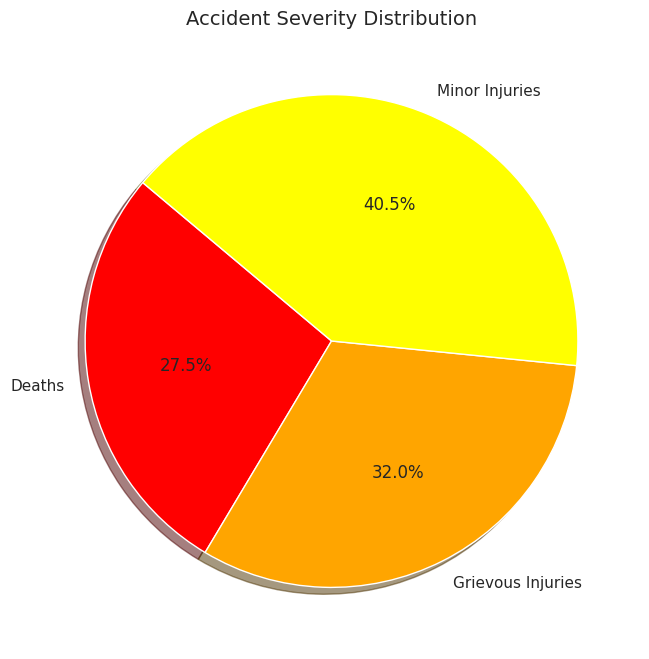

In [ ]:
# Aggregate totals
total_killed = df_weather_cleaned[
    [f"person_killed_{wt}" for wt in weather_types]
].sum().sum()

total_grievous = df_weather_cleaned[
    [f"grievously_injured_{wt}" for wt in weather_types]
].sum().sum()

total_minor = df_weather_cleaned[
    [f"minor_injury_{wt}" for wt in weather_types]
].sum().sum()

# Labels & Data
labels = ["Deaths", "Grievous Injuries", "Minor Injuries"]
sizes = [total_killed, total_grievous, total_minor]
colors = ["red", "orange", "yellow"]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, shadow=True)
plt.title("Accident Severity Distribution", fontsize=14)
plt.show()


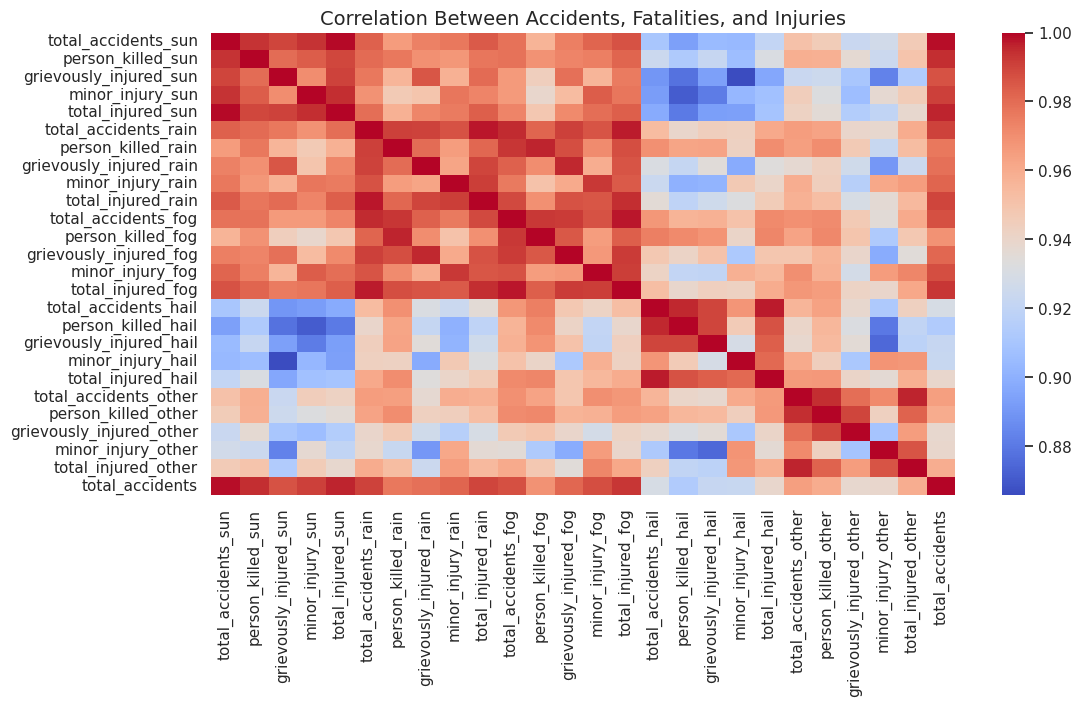

In [ ]:
import numpy as np

# Select numerical columns
num_cols_weather = df_weather_cleaned.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix_weather = num_cols_weather.corr()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix_weather, cmap="coolwarm", annot=False)
plt.title("Correlation Between Accidents, Fatalities, and Injuries", fontsize=14)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features: Number of accidents in different weather conditions
X_weather = df_weather_cleaned[[f"total_accidents_{wt}" for wt in weather_types]]
y_weather = df_weather_cleaned["total_accidents"]

# Train-Test Split
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

# Train Model
rf_model_weather = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_weather.fit(X_train_w, y_train_w)

# Predict
y_pred_w = rf_model_weather.predict(X_test_w)

# Model Evaluation
mae_w = mean_absolute_error(y_test_w, y_pred_w)
print(f"Mean Absolute Error (Weather Data - RF): {mae_w}")


Mean Absolute Error (Weather Data - RF): 1899.0012499999998


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMax Scaling
scaler_weather = MinMaxScaler()
X_scaled_weather = scaler_weather.fit_transform(X_weather)
y_scaled_weather = scaler_weather.fit_transform(y_weather.values.reshape(-1,1)).ravel()

# Train-Test Split
X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(X_scaled_weather, y_scaled_weather, test_size=0.2, random_state=42)

# Train Random Forest Again
rf_model_weather.fit(X_train_sw, y_train_sw)

# Predict & Scale Back
y_pred_scaled_w = rf_model_weather.predict(X_test_sw)
y_pred_w_final = scaler_weather.inverse_transform(y_pred_scaled_w.reshape(-1, 1)).ravel()

# Evaluate Model
mae_scaled_w = mean_absolute_error(y_test_sw, y_pred_w_final)
print(f"Mean Absolute Error (After Scaling - Weather Data): {mae_scaled_w}")


Mean Absolute Error (After Scaling - Weather Data): 14808.254794130657


<Figure size 1000x600 with 0 Axes>

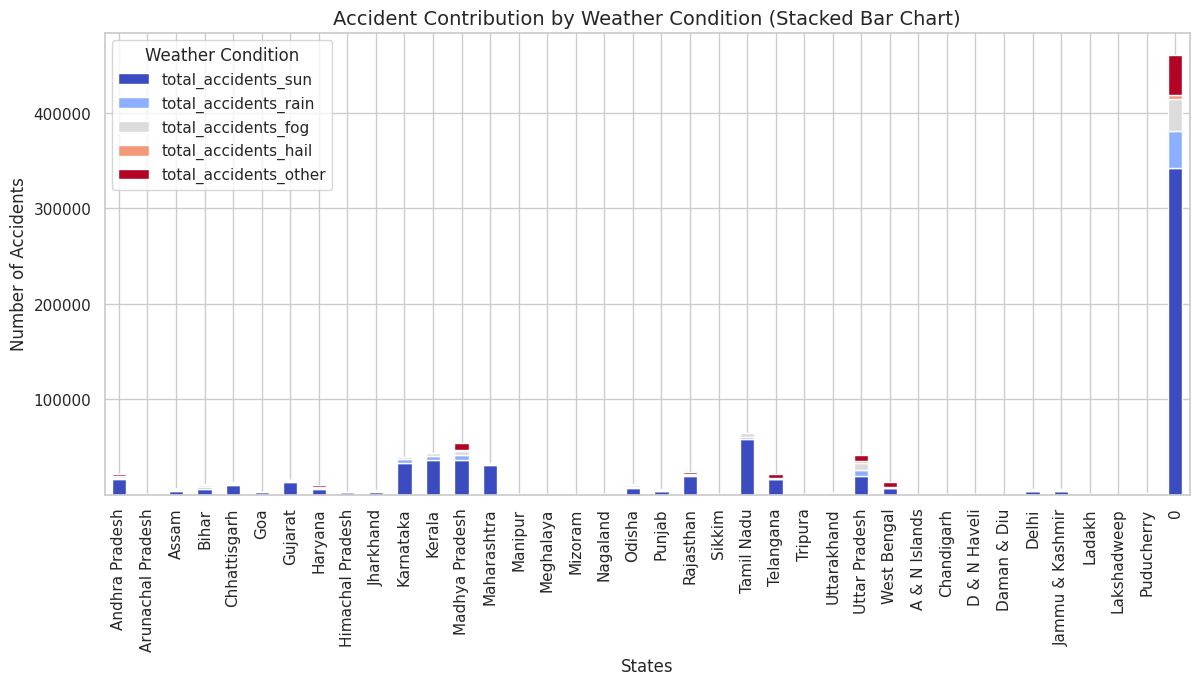

In [ ]:
plt.figure(figsize=(10, 6))

# Plot stacked bar chart
df_weather_cleaned.set_index("state")[
    [f"total_accidents_{wt}" for wt in weather_types]
].plot(kind="bar", stacked=True, figsize=(14,6), colormap="coolwarm")

plt.xlabel("States", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accident Contribution by Weather Condition (Stacked Bar Chart)", fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Weather Condition")
plt.show()


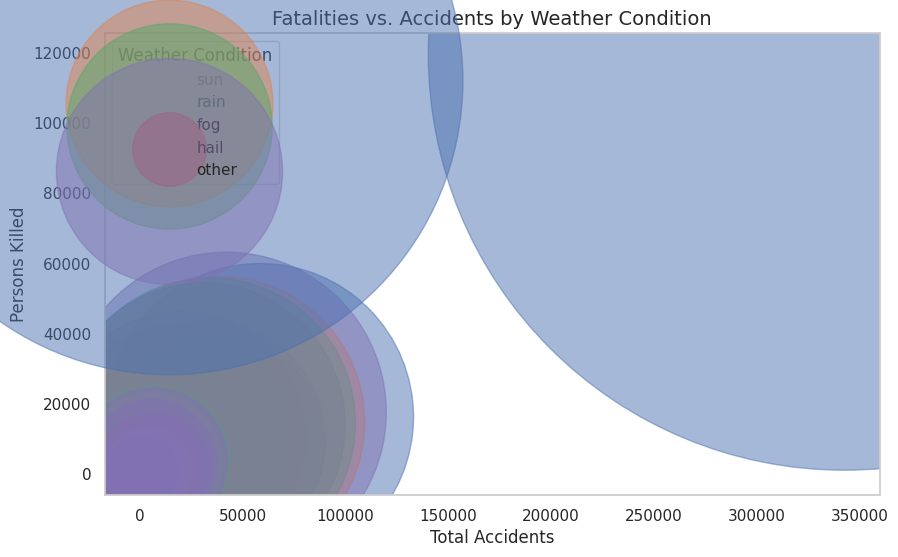

In [ ]:
plt.figure(figsize=(10,6))

# Bubble Chart: Fatalities vs. Accidents
for wt in weather_types:
    plt.scatter(
        df_weather_cleaned[f"total_accidents_{wt}"],
        df_weather_cleaned[f"person_killed_{wt}"],
        s=df_weather_cleaned[f"person_killed_{wt}"] * 3, alpha=0.5, label=wt
    )

plt.xlabel("Total Accidents", fontsize=12)
plt.ylabel("Persons Killed", fontsize=12)
plt.title("Fatalities vs. Accidents by Weather Condition", fontsize=14)
plt.legend(title="Weather Condition")
plt.grid()
plt.show()


In [ ]:
pip install squarify

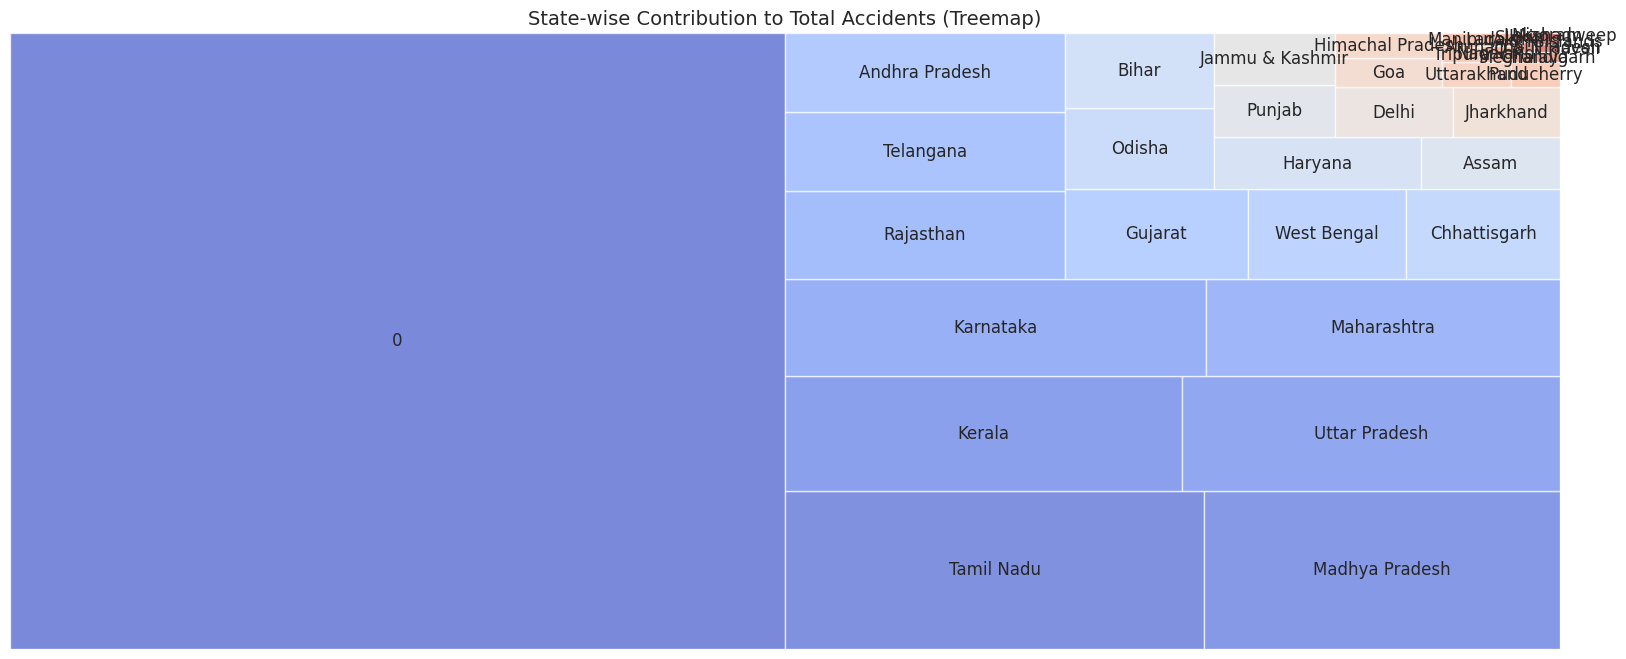

In [ ]:
import squarify

state_accidents = state_accidents[state_accidents > 0]  # Filter out zero values

# Treemap Plot
plt.figure(figsize=(20, 8))
squarify.plot(
    sizes=state_accidents,
    label=state_accidents.index,
    alpha=0.7,
    color=sns.color_palette("coolwarm", len(state_accidents))
)
plt.title("State-wise Contribution to Total Accidents (Treemap)", fontsize=14)
plt.axis("off")
plt.show()


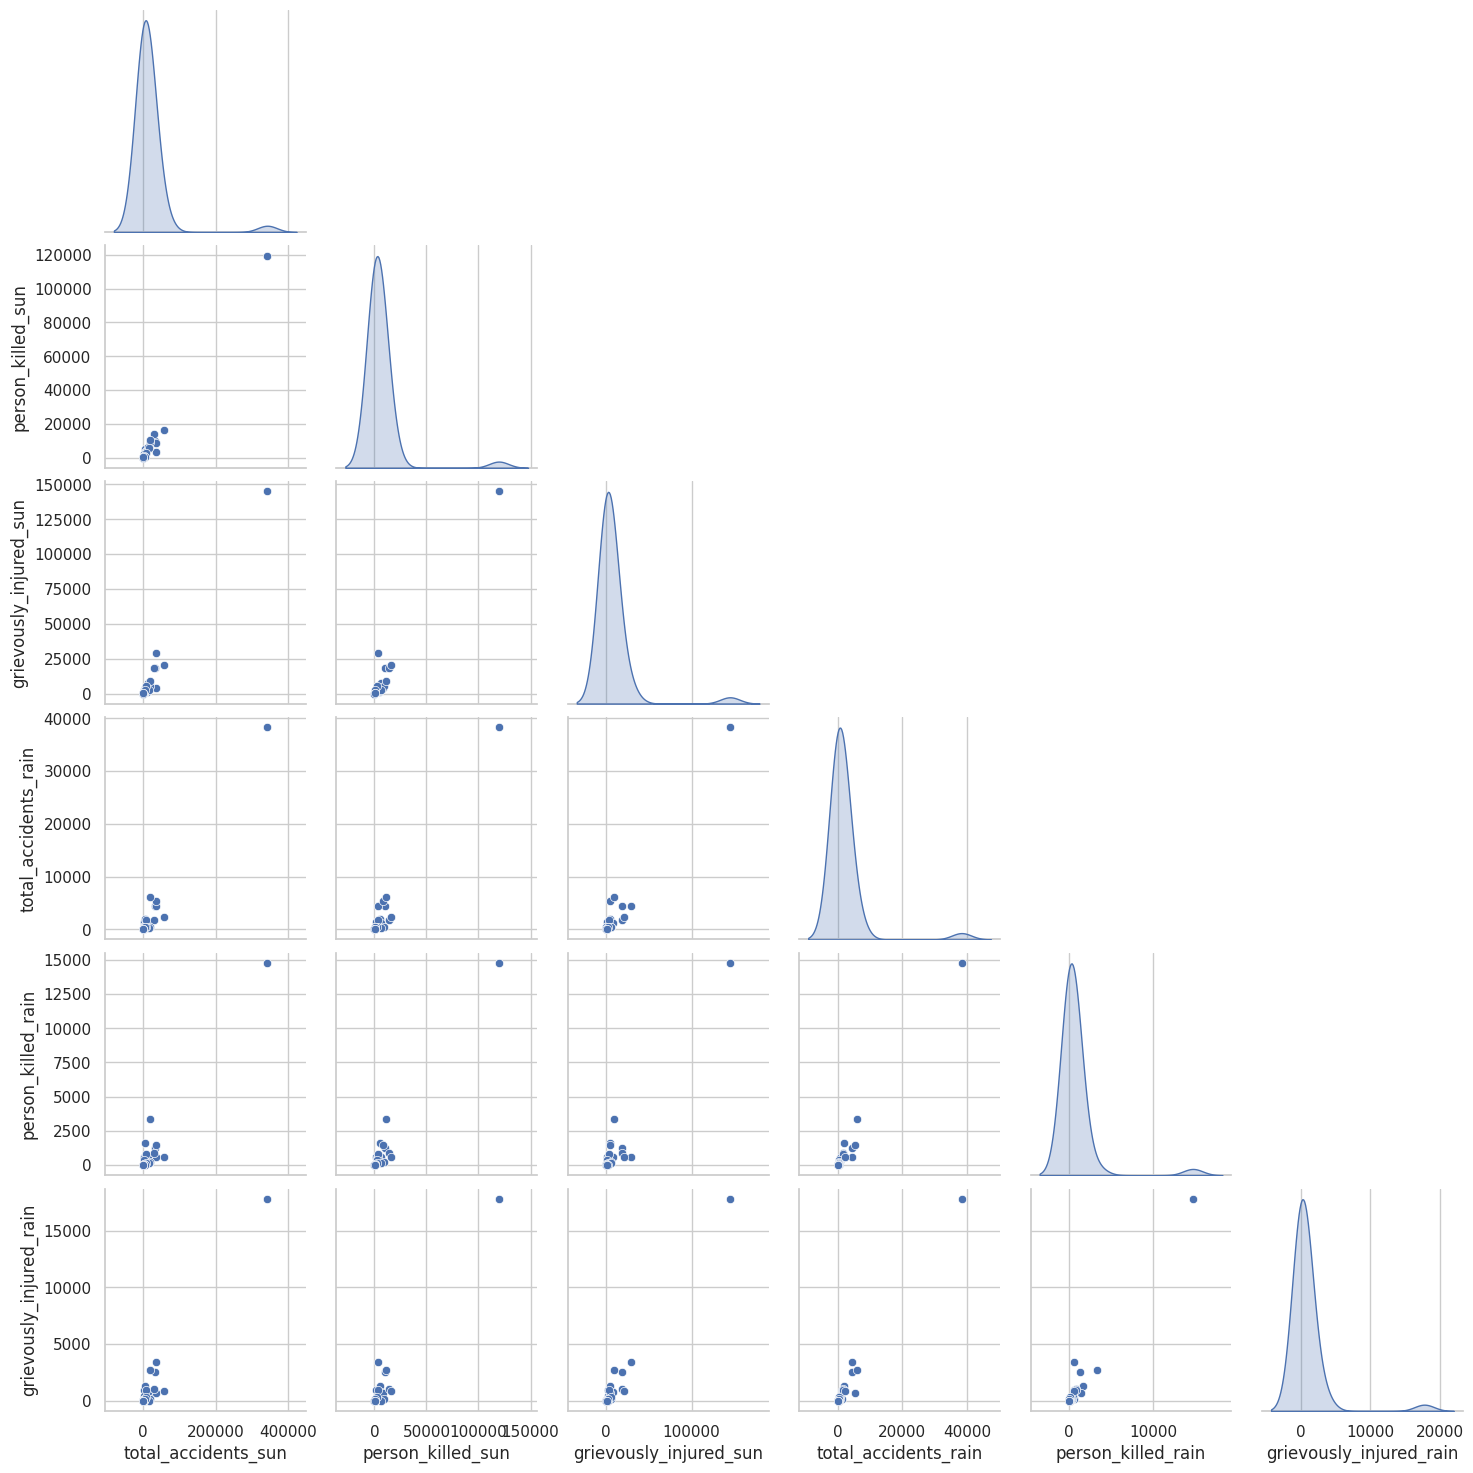

In [ ]:
import seaborn as sns

# Select relevant columns
pairplot_cols = [
    "total_accidents_sun", "person_killed_sun", "grievously_injured_sun",
    "total_accidents_rain", "person_killed_rain", "grievously_injured_rain"
]

# Pairplot visualization
sns.pairplot(df_weather_cleaned[pairplot_cols], diag_kind="kde", corner=True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generate monthly accident data from 2022
date_range = pd.date_range(start="2022-01", periods=12*6, freq="M")  # 6 years till 2028
monthly_accidents = df_weather_cleaned["total_accidents"].sum() / 12  # Average monthly

# Create DataFrame
ts_weather = pd.DataFrame({"date": date_range, "accidents": np.random.normal(monthly_accidents, 500, len(date_range))})
ts_weather.set_index("date", inplace=True)

# Display sample data
print(ts_weather.head())


               accidents
date                    
2022-01-31  76879.527119
2022-02-28  76989.432984
2022-03-31  77313.720930
2022-04-30  76474.836436
2022-05-31  76571.049416


<ipython-input-287-10f39f5fda0b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2022-01", periods=12*6, freq="M")  # 6 years till 2028


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3amm24qk/0dnu4usj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3amm24qk/capyfolo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39951', 'data', 'file=/tmp/tmp3amm24qk/0dnu4usj.json', 'init=/tmp/tmp3amm24qk/capyfolo.json', 'output', 'file=/tmp/tmp3amm24qk/prophet_modellwhw_9jz/prophet_model-20250322103518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:35:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

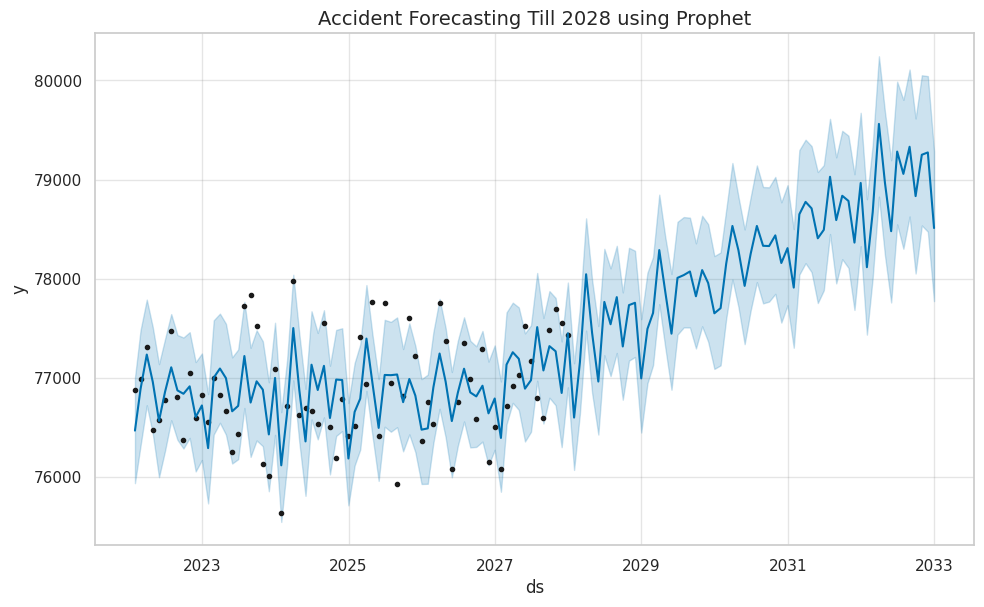

In [ ]:
from prophet import Prophet

# Convert DataFrame for Prophet
df_prophet = ts_weather.reset_index()
df_prophet.columns = ["ds", "y"]  # Prophet requires "ds" (date) and "y" (value)

# Train Prophet Model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create Future DataFrame
future_dates = prophet_model.make_future_dataframe(periods=future_steps, freq="M")

# Forecast
forecast_prophet = prophet_model.predict(future_dates)

# Plot Forecast
prophet_model.plot(forecast_prophet)
plt.title("Accident Forecasting Till 2028 using Prophet", fontsize=14)
plt.show()


#national highway analysis dataset

In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/national highway analysis.csv"
df_nh = pd.read_csv(file_path)

# Display basic info
print(df_nh.info())
print(df_nh.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sl_no                  38 non-null     object
 1   state                  37 non-null     object
 2   ped_nhai_accidents     38 non-null     int64 
 3   ped_nhai_deaths        38 non-null     int64 
 4   ped_pwd_accidents      38 non-null     int64 
 5   ped_pwd_deaths         38 non-null     int64 
 6   ped_other_accidents    38 non-null     int64 
 7   ped_other_deaths       38 non-null     int64 
 8   bicy_nhai_accidents    38 non-null     int64 
 9   bicy_nhai_deaths       38 non-null     int64 
 10  bicy_pwd_accidents     38 non-null     int64 
 11  bicy_pwd_deaths        38 non-null     int64 
 12  bicy_other_accidents   38 non-null     int64 
 13  bicy_other_deaths      38 non-null     int64 
 14  2w_nhai_accidents      38 non-null     int64 
 15  2w_nhai_deaths         38

In [ ]:
# Define structured column names
cleaned_columns = [
    "sl_no", "state",
    "ped_nhai_accidents", "ped_nhai_deaths", "ped_pwd_accidents", "ped_pwd_deaths", "ped_other_accidents", "ped_other_deaths",
    "bicy_nhai_accidents", "bicy_nhai_deaths", "bicy_pwd_accidents", "bicy_pwd_deaths", "bicy_other_accidents", "bicy_other_deaths",
    "2w_nhai_accidents", "2w_nhai_deaths", "2w_pwd_accidents", "2w_pwd_deaths", "2w_other_accidents", "2w_other_deaths",
    "ar_nhai_accidents", "ar_nhai_deaths", "ar_pwd_accidents", "ar_pwd_deaths", "ar_other_accidents", "ar_other_deaths",
    "c_nhai_accidents", "c_nhai_deaths", "c_pwd_accidents", "c_pwd_deaths", "c_other_accidents", "c_other_deaths",
    "t_nhai_accidents", "t_nhai_deaths", "t_pwd_accidents", "t_pwd_deaths", "t_other_accidents", "t_other_deaths",
    "bus_nhai_accidents", "bus_nhai_deaths", "bus_pwd_accidents", "bus_pwd_deaths", "bus_other_accidents", "bus_other_deaths",
    "ev_nhai_accidents", "ev_nhai_deaths", "ev_pwd_accidents", "ev_pwd_deaths", "ev_other_accidents", "ev_other_deaths",
    "other_nhai_accidents", "other_nhai_deaths", "other_pwd_accidents", "other_pwd_deaths", "other_other_accidents", "other_other_deaths"
]

# Rename columns
df_nh.columns = cleaned_columns

# Display updated DataFrame
print(df_nh.head())


  sl_no              state  ped_nhai_accidents  ped_nhai_deaths  \
0     1     Andhra Pradesh                 854              469   
1     2  Arunachal Pradesh                   2                2   
2     3              Assam                 249              137   
3     4              Bihar                1300             1100   
4     5       Chhattisgarh                 190              125   

   ped_pwd_accidents  ped_pwd_deaths  ped_other_accidents  ped_other_deaths  \
0                311             163                   85                37   
1                  3               2                    0                 0   
2                108              43                   71                16   
3                228             230                   25                25   
4                201             112                    0                 0   

   bicy_nhai_accidents  bicy_nhai_deaths  ...  ev_pwd_accidents  \
0                   67                33  ...          

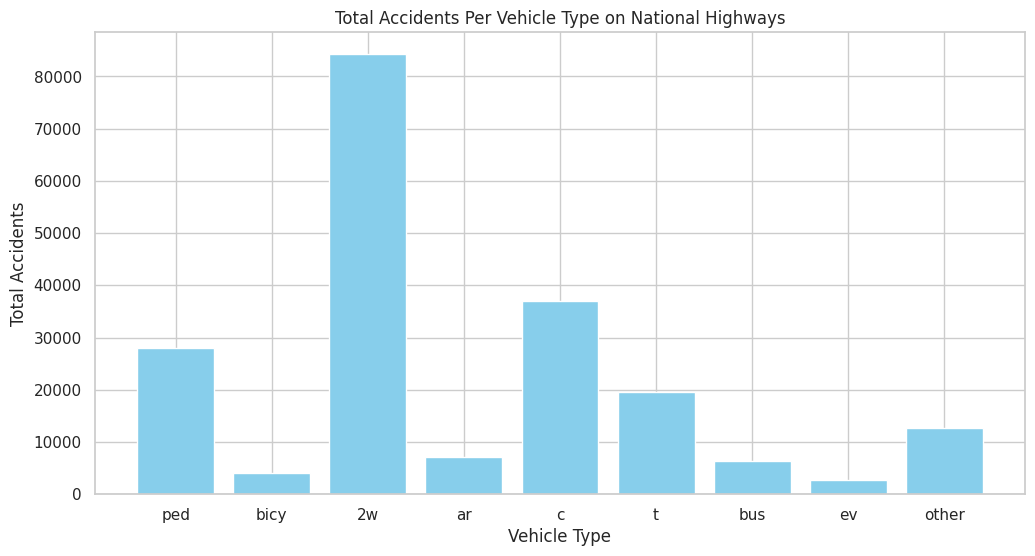

In [ ]:
import matplotlib.pyplot as plt

# Select relevant columns
vehicle_types = ["ped", "bicy", "2w", "ar", "c", "t", "bus", "ev", "other"]
accident_totals = [df_nh[f"{veh}_nhai_accidents"].sum() for veh in vehicle_types]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(vehicle_types, accident_totals, color="skyblue")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Accidents")
plt.title("Total Accidents Per Vehicle Type on National Highways")
plt.show()


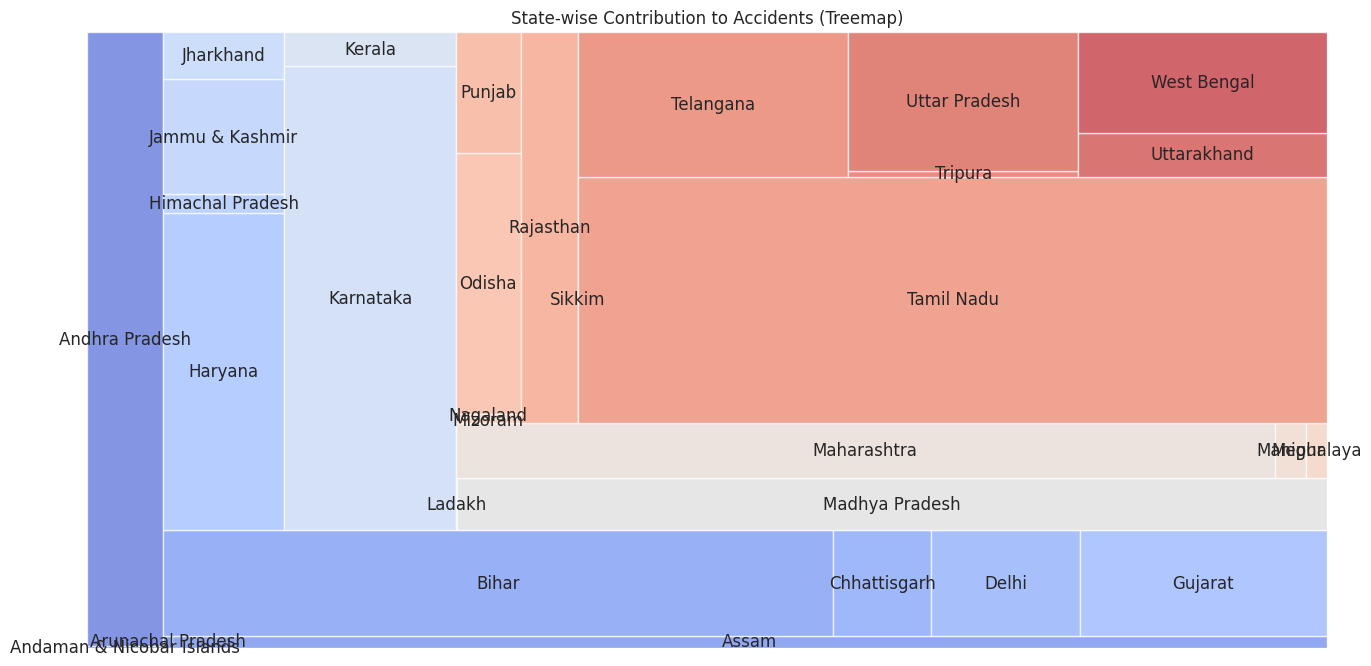

In [ ]:
import squarify
import seaborn as sns

# Aggregate total accidents per state
state_accidents = df_nh.groupby("state")["ped_nhai_accidents"].sum()

# Remove zero values
state_accidents = state_accidents[state_accidents > 0]

# Plot treemap
plt.figure(figsize=(16, 8))
squarify.plot(sizes=state_accidents, label=state_accidents.index, alpha=0.7, color=sns.color_palette("coolwarm", len(state_accidents)))
plt.title("State-wise Contribution to Accidents (Treemap)")
plt.axis("off")
plt.show()


<ipython-input-311-19c5f6061a89>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2022-01", periods=12, freq="M")
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

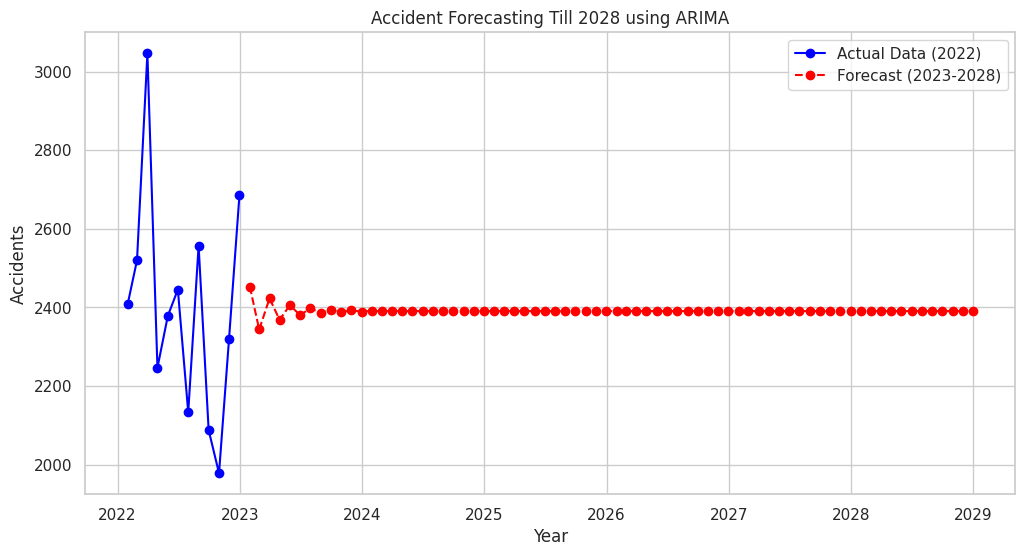

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Generate time-series data
date_range = pd.date_range(start="2022-01", periods=12, freq="M")
monthly_accidents = df_nh["ped_nhai_accidents"].sum() / 12

# Create DataFrame
ts_nh = pd.DataFrame({"date": date_range, "accidents": np.random.normal(monthly_accidents, 500, len(date_range))})
ts_nh.set_index("date", inplace=True)

# Train ARIMA Model
model = ARIMA(ts_nh["accidents"], order=(2,1,2))
model_fit = model.fit()

# Forecast 2023-2028 (6 years)
future_steps = 12 * 6
forecast = model_fit.forecast(steps=future_steps)
future_dates = pd.date_range(start="2023-01", periods=future_steps, freq="M")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(ts_nh.index, ts_nh["accidents"], label="Actual Data (2022)", marker="o", color="blue")
plt.plot(future_dates, forecast, label="Forecast (2023-2028)", linestyle="dashed", marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Accidents")
plt.title("Accident Forecasting Till 2028 using ARIMA")
plt.legend()
plt.show()


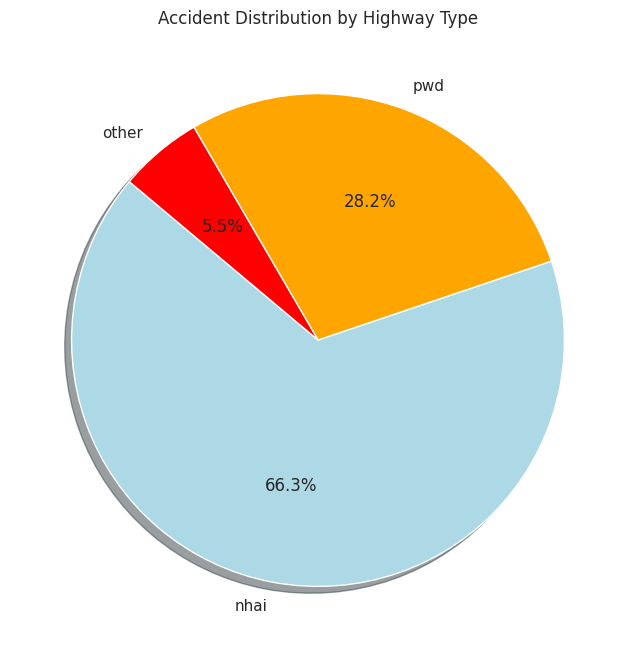

In [ ]:
import matplotlib.pyplot as plt

# Compute total accidents for each highway type
highway_types = ["nhai", "pwd", "other"]
accident_totals = [
    df_nh[[f"{veh}_nhai_accidents" for veh in vehicle_types]].sum().sum(),
    df_nh[[f"{veh}_pwd_accidents" for veh in vehicle_types]].sum().sum(),
    df_nh[[f"{veh}_other_accidents" for veh in vehicle_types]].sum().sum()
]

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(accident_totals, labels=highway_types, autopct="%1.1f%%", startangle=140, shadow=True, colors=["lightblue", "orange", "red"])
plt.title("Accident Distribution by Highway Type")
plt.show()


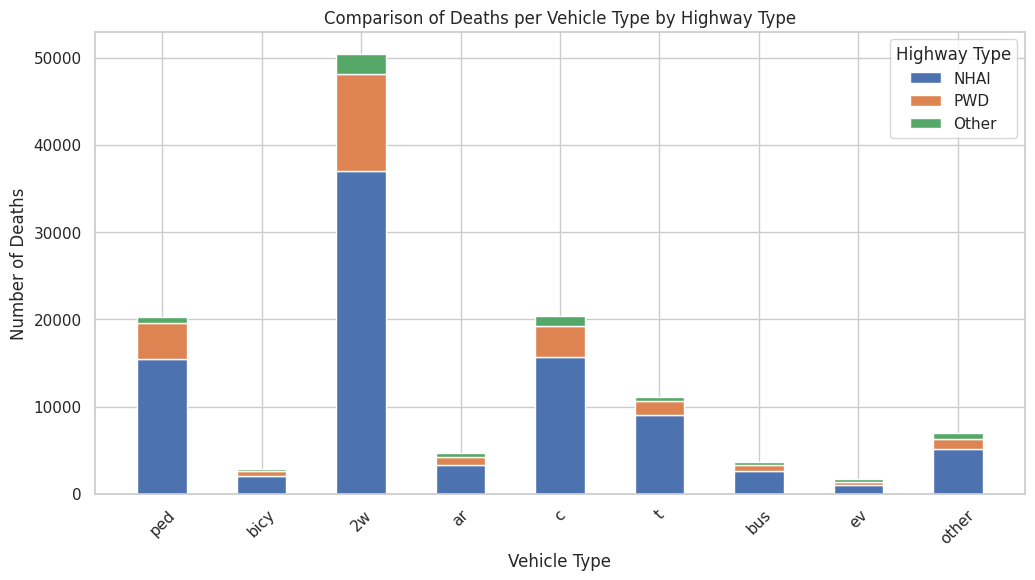

In [ ]:
import numpy as np

# Prepare data
highway_labels = ["NHAI", "PWD", "Other"]
vehicle_types = ["ped", "bicy", "2w", "ar", "c", "t", "bus", "ev", "other"]
deaths_data = np.array([
    [df_nh[f"{veh}_nhai_deaths"].sum() for veh in vehicle_types],
    [df_nh[f"{veh}_pwd_deaths"].sum() for veh in vehicle_types],
    [df_nh[f"{veh}_other_deaths"].sum() for veh in vehicle_types]
])

# Plot Stacked Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.5
bottom = np.zeros(len(vehicle_types))

for i in range(len(highway_labels)):
    ax.bar(vehicle_types, deaths_data[i], bar_width, label=highway_labels[i], bottom=bottom)
    bottom += deaths_data[i]

ax.set_xlabel("Vehicle Type")
ax.set_ylabel("Number of Deaths")
ax.set_title("Comparison of Deaths per Vehicle Type by Highway Type")
ax.legend(title="Highway Type")
plt.xticks(rotation=45)
plt.show()


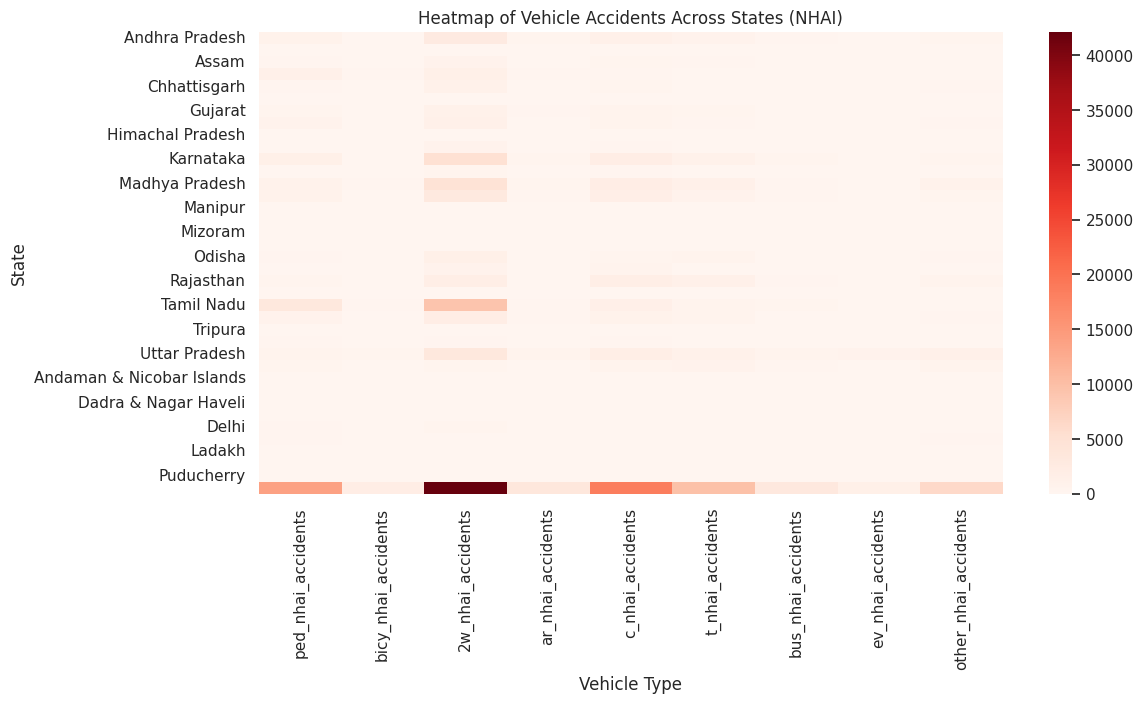

In [ ]:
import seaborn as sns

# Select relevant columns for heatmap
heatmap_data = df_nh.set_index("state")[
    [f"{veh}_nhai_accidents" for veh in vehicle_types]
]

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Reds", annot=False)
plt.title("Heatmap of Vehicle Accidents Across States (NHAI)")
plt.xlabel("Vehicle Type")
plt.ylabel("State")
plt.show()


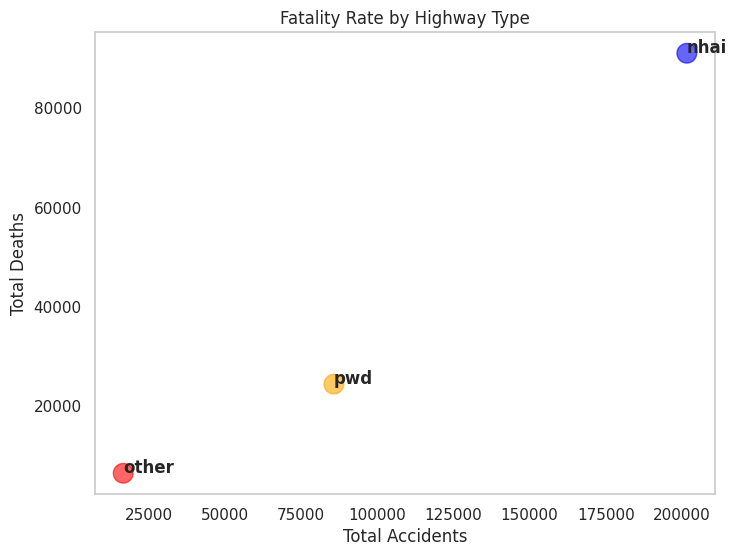

In [ ]:
# Compute total accidents & deaths per highway type
highway_accidents = [
    df_nh[[f"{veh}_nhai_accidents" for veh in vehicle_types]].sum().sum(),
    df_nh[[f"{veh}_pwd_accidents" for veh in vehicle_types]].sum().sum(),
    df_nh[[f"{veh}_other_accidents" for veh in vehicle_types]].sum().sum()
]

highway_deaths = [
    df_nh[[f"{veh}_nhai_deaths" for veh in vehicle_types]].sum().sum(),
    df_nh[[f"{veh}_pwd_deaths" for veh in vehicle_types]].sum().sum(),
    df_nh[[f"{veh}_other_deaths" for veh in vehicle_types]].sum().sum()
]

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(highway_accidents, highway_deaths, color=["blue", "orange", "red"], s=200, alpha=0.6)

for i, txt in enumerate(highway_types):
    plt.annotate(txt, (highway_accidents[i], highway_deaths[i]), fontsize=12, weight="bold")

plt.xlabel("Total Accidents")
plt.ylabel("Total Deaths")
plt.title("Fatality Rate by Highway Type")
plt.grid()
plt.show()


<ipython-input-316-0c2f2c3f7808>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2022-01", periods=12, freq="M")


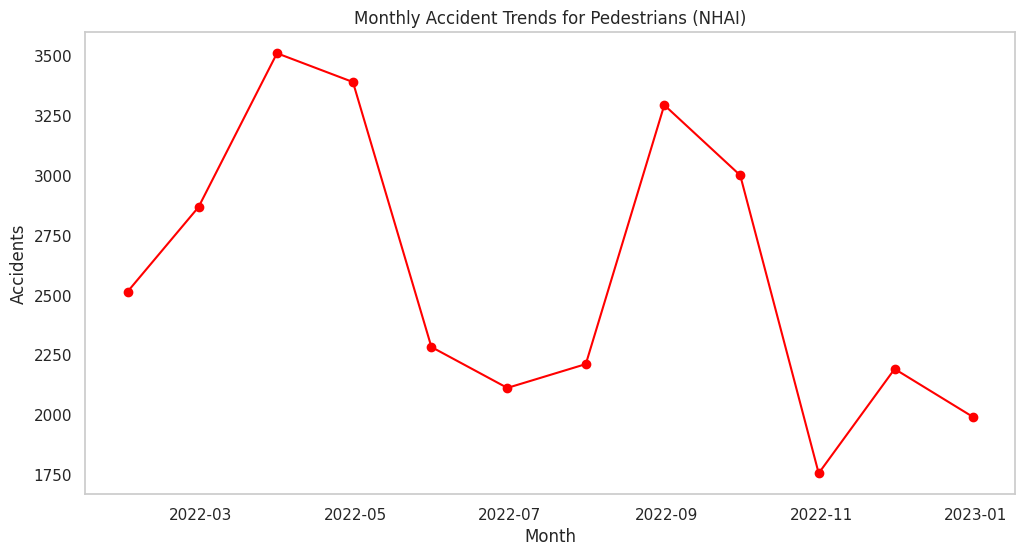

In [ ]:
# Generate monthly accident trends
import pandas as pd
import numpy as np

date_range = pd.date_range(start="2022-01", periods=12, freq="M")
monthly_accidents = df_nh["ped_nhai_accidents"].sum() / 12  # Example: Pedestrian accidents

# Create DataFrame
ts_accidents = pd.DataFrame({"date": date_range, "accidents": np.random.normal(monthly_accidents, 500, len(date_range))})
ts_accidents.set_index("date", inplace=True)

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(ts_accidents.index, ts_accidents["accidents"], marker="o", linestyle="-", color="red")
plt.xlabel("Month")
plt.ylabel("Accidents")
plt.title("Monthly Accident Trends for Pedestrians (NHAI)")
plt.grid()
plt.show()


In [ ]:
pip install dash plotly pandas


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.6 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=fc300366a3c93cfa9b9603a830f8f23582550cbc39437b87507a98fa6fec7250
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
pip install dash dash-bootstrap-components plotly pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output

# Load dataset
file_path = "/content/national highway analysis.csv"
df_nh = pd.read_csv(file_path)

# Flatten column names
df_nh.columns = df_nh.columns.str.lower().str.replace(" ", "_")

# Vehicle and Highway categories
vehicle_types = ["ped", "bicy", "2w", "ar", "c", "t", "bus", "ev", "other"]
highway_types = ["nhai", "pwd", "other"]

# Aggregate accident data per vehicle type and highway
accident_data = []
for veh in vehicle_types:
    for hw in highway_types:
        accident_data.append({
            "vehicle_type": veh,
            "highway_type": hw,
            "total_accidents": df_nh[f"{veh}_{hw}_accidents"].sum(),
            "total_deaths": df_nh[f"{veh}_{hw}_deaths"].sum()
        })

df_summary = pd.DataFrame(accident_data)


In [ ]:
# Initialize Dash app with Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.SUPERHERO])

app.layout = dbc.Container([
    html.H1("🚦 National Highway Accident Dashboard", style={"text-align": "center", "color": "white"}),

    dbc.Row([
        dbc.Col([
            html.Label("📌 Select Vehicle Type:", style={"font-weight": "bold"}),
            dcc.Dropdown(
                id="vehicle_dropdown",
                options=[{"label": v.title(), "value": v} for v in vehicle_types],
                value="ped",
                clearable=False,
                style={"color": "black"}
            )
        ], width=6),

        dbc.Col([
            html.Label("📌 Select Highway Type:", style={"font-weight": "bold"}),
            dcc.Dropdown(
                id="highway_dropdown",
                options=[{"label": h.upper(), "value": h} for h in highway_types],
                value="nhai",
                clearable=False,
                style={"color": "black"}
            )
        ], width=6),
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Graph(id="accident_bar_chart", config={"displayModeBar": False}), width=6),
        dbc.Col(dcc.Graph(id="fatality_pie_chart", config={"displayModeBar": False}), width=6),
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Graph(id="accident_trend_chart"), width=12),
    ], className="mb-4"),

], fluid=True)


In [ ]:
@app.callback(
    [Output("accident_bar_chart", "figure"),
     Output("fatality_pie_chart", "figure"),
     Output("accident_trend_chart", "figure")],
    [Input("vehicle_dropdown", "value"),
     Input("highway_dropdown", "value")]
)
def update_charts(selected_vehicle, selected_highway):
    # Filter data
    filtered_data = df_summary[
        (df_summary["vehicle_type"] == selected_vehicle) &
        (df_summary["highway_type"] == selected_highway)
    ]

    # 🎨 Enhanced Bar Chart
    fig_bar = px.bar(
        filtered_data,
        x="vehicle_type",
        y="total_accidents",
        title=f"📊 Total Accidents for {selected_vehicle.title()} on {selected_highway.upper()}",
        labels={"total_accidents": "Total Accidents"},
        color="vehicle_type",
        color_discrete_sequence=["#1f77b4"],
        template="plotly_dark",
        text_auto=True
    )

    # 🎨 Animated Pie Chart
    fig_pie = px.pie(
        filtered_data,
        names="vehicle_type",
        values="total_deaths",
        title=f"☠️ Fatalities Distribution for {selected_vehicle.title()} on {selected_highway.upper()}",
        color_discrete_sequence=px.colors.sequential.RdBu,
        hole=0.3,
        template="plotly_dark"
    )

    # 🎨 Smooth Line Chart for Accident Trends
    date_range = pd.date_range(start="2023-01", periods=60, freq="M")
    accident_forecast = np.linspace(
        filtered_data["total_accidents"].values[0],
        filtered_data["total_accidents"].values[0] * 1.2, 60
    )

    df_forecast = pd.DataFrame({"date": date_range, "accidents": accident_forecast})

    fig_trend = px.line(
        df_forecast,
        x="date",
        y="accidents",
        title=f"📈 Accident Trend Prediction for {selected_vehicle.title()} on {selected_highway.upper()} (Till 2028)",
        labels={"accidents": "Predicted Accidents"},
        template="plotly_dark",
        line_shape="spline",
        markers=True
    )

    return fig_bar, fig_pie, fig_trend


In [ ]:
if __name__ == "__main__":
    app.run(debug=True)


<IPython.core.display.Javascript object>